In [32]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append("../codes")


import dyslexia_data as dd
import utilities as util

In [33]:

def load_data(data_name, group):

    """
    :param data_name: string, name of dataset
    :param group: string, W&B group name, i.e., "
            "using Features: FClustering, FClassification, FRegression, "
            "or using Time-series: TClustering, TClassification, TRegression")
    :return:
        data_org := Pandas df, concatenated (normal + abnormal) not preprocessed dataset.
        x := numpy, independent variables (features)
        y := numpy dependent variables (target values)
        indicators := list, a list of subject id, sentence etc depending on the dataset structure

    """

    # load the corresponding data
    data = {}
    # demographic data
    data_name = data_name.lower()

    if data_name == "dd_demo":

        demo_xls = pd.ExcelFile("../data/demo.xlsx")
        indicators = ['SubjID', ]

        data["normal"] = remove_missing_data(
            df=pd.read_excel(demo_xls, "norm").sort_values(by=indicators)
        )

        data["normal"].replace({"fem": 1, "f": 1, "masc": 2, "m": 2}, inplace=True)

        data["abnormal"] = remove_missing_data(
            df=pd.read_excel(demo_xls, "dyslexia").sort_values(by=indicators)
        )

        data["abnormal"].replace({"fem": 1, "f": 1, "masc": 2, "m": 2}, inplace=True)

        q_features = ['Age', 'IQ', 'Sound_detection', 'Sound_change', ]
        c_features = ['Sex', 'Grade', ]

        if "regression" in group.lower():  # or "baseline" in group.lower()
            targets = ['Reading_speed', ]
        else:
            targets = ['Group', ]

        all_targets = ['Reading_speed', 'Group']

    # ia_report data
    elif data_name == "dd_ia":
        # print("Load IA report!")

        ia_report_xls = pd.ExcelFile("../data/IA_report.xlsx")

        indicators = ['SubjectID', 'Sentence_ID', 'Word_Number', ]

        data["normal"] = remove_missing_data(
            df=pd.read_excel(ia_report_xls, "norm").sort_values(
                by=indicators,
                axis=0)
        )

        data["abnormal"] = remove_missing_data(
            df=pd.read_excel(ia_report_xls, "dyslexia").sort_values(
                by=indicators,
                axis=0)
        )

        q_features = ['FIXATION_COUNT', 'TOTAL_READING_TIME',
                      'FIRST_FIXATION_DURATION', 'FIRST_FIXATION_X',
                      'FIRST_FIXATION_Y', 'FIRST_RUN_TOTAL_READING_TIME',
                      'FIRST_SACCADE_AMPLITUDE', 'REGRESSION_IN', 'REGRESSION_OUT',
                      'REGRESSION_OUT_FULL', 'REGRESSION_PATH_DURATION']

        c_features = ['QUESTION_ACCURACY', 'SKIP', ]

        # if "regression" in group.lower():
        #     targets = ['Reading_speed', ]
        # else:
        #     targets = ['Group', ]

        targets = ['Group', ]
        all_targets = ['Group', ]

    # fixation report data
    elif data_name == "dd_fix":

        fixation_xls = pd.ExcelFile("../data/Fixation_report.xlsx")
        indicators = ['SubjectID', 'Sentence_ID', 'Word_Number', ]

        data["normal"] = remove_missing_data(
            df=pd.read_excel(fixation_xls, "norm").sort_values(
                by=indicators,
                axis=0)
        )

        data["abnormal"] = remove_missing_data(
            df=pd.read_excel(fixation_xls, "dyslexia").sort_values(
                by=indicators,
                axis=0)
        )

        q_features = ['FIX_X', 'FIX_Y', 'FIX_DURATION', ]
        c_features = []

        if "regression" in group.lower():  # or "baseline" in group.lower():  # for rnd evaluation
            targets = ['Reading_speed', ]
        else:
            targets = ['Group', ]

        all_targets = ['Reading_speed', 'Group']

    else:
        print("Undefined data set, define it above!")

    _data_org = pd.concat([data["normal"], data["abnormal"]])
    _data_org = _data_org.replace({"norm": 1, "dyslexia": 2}, )

    if len(c_features) > 0:
        data_org = pd.get_dummies(_data_org, columns=c_features)
    else:
        data_org = _data_org

    all_features = data_org.columns
    features = set(all_features) - set(indicators) - set(all_targets)

    # I should modify here and after it
    x = data_org.loc[:, features].values
    y = data_org.loc[:, targets].values
    
    x = x.astype(float)
    if "regression" in group.lower():
        y = y.astype(float)
    else:
        y = y.astype(int)

    print("Check data for NaNs or Inf: \n",
          "x: ",  np.where(x == np.inf), np.where(x == np.nan), "\n",
          "y: ", np.where(y == np.inf), np.where(y == np.nan), "\n",
          "shapes:", x.shape, y.shape,
          )

    return data_org, x, y, features, targets, indicators


def remove_missing_data(df):
    for col in df.columns:
        try:
            df[col].replace({".": np.nan}, inplace=True)
        except Exception as e:
            print(e, "\n No missing values in", col)

    return df.dropna()


## Demographic 

In [3]:
demo_org, demo_x, demo_y, demo_features, demo_targets, demo_indicators = load_data(
    data_name="DD_Demo", group="FClassification")


Cannot compare types 'ndarray(dtype=int64)' and 'str' 
 No missing values in Grade
Cannot compare types 'ndarray(dtype=int64)' and 'str' 
 No missing values in Age
Cannot compare types 'ndarray(dtype=int64)' and 'str' 
 No missing values in IQ
Cannot compare types 'ndarray(dtype=int64)' and 'str' 
 No missing values in Reading_speed
Cannot compare types 'ndarray(dtype=float64)' and 'str' 
 No missing values in Sound_detection
Cannot compare types 'ndarray(dtype=float64)' and 'str' 
 No missing values in Sound_change
Cannot compare types 'ndarray(dtype=int64)' and 'str' 
 No missing values in Grade
Cannot compare types 'ndarray(dtype=int64)' and 'str' 
 No missing values in Age
Cannot compare types 'ndarray(dtype=int64)' and 'str' 
 No missing values in IQ
Cannot compare types 'ndarray(dtype=int64)' and 'str' 
 No missing values in Reading_speed
Cannot compare types 'ndarray(dtype=float64)' and 'str' 
 No missing values in Sound_detection
Cannot compare types 'ndarray(dtype=float64)' an

In [4]:
type(demo_y[0][0]), type(demo_x[0][0])

(numpy.int64, numpy.float64)

In [50]:
demo_org.head()

Group     SubjID  Age  IQ  Reading_speed  Sound_detection  Sound_change  \
182      1  108_norm2   10  34            139             1.00          0.95   
184      1   10_norm2   10  23            102             0.62          0.91   
215      1   11_norm1    9  28             71             0.95          0.91   
185      1   11_norm2   10  34            110             1.00          0.79   
210      1   12_norm1    8  32             60             0.95          0.62   

     Sex_1  Sex_2  Grade_1  Grade_2  Grade_3  Grade_4  Grade_5  Grade_6  
182      1      0        0        0        0        1        0        0  
184      1      0        0        0        0        1        0        0  
215      1      0        0        1        0        0        0        0  
185      0      1        0        0        0        1        0        0  
210      0      1        0        1        0        0        0        0

In [6]:
demo_x.shape, demo_y.shape, demo_org.shape

((289, 12), (289, 1), (289, 15))

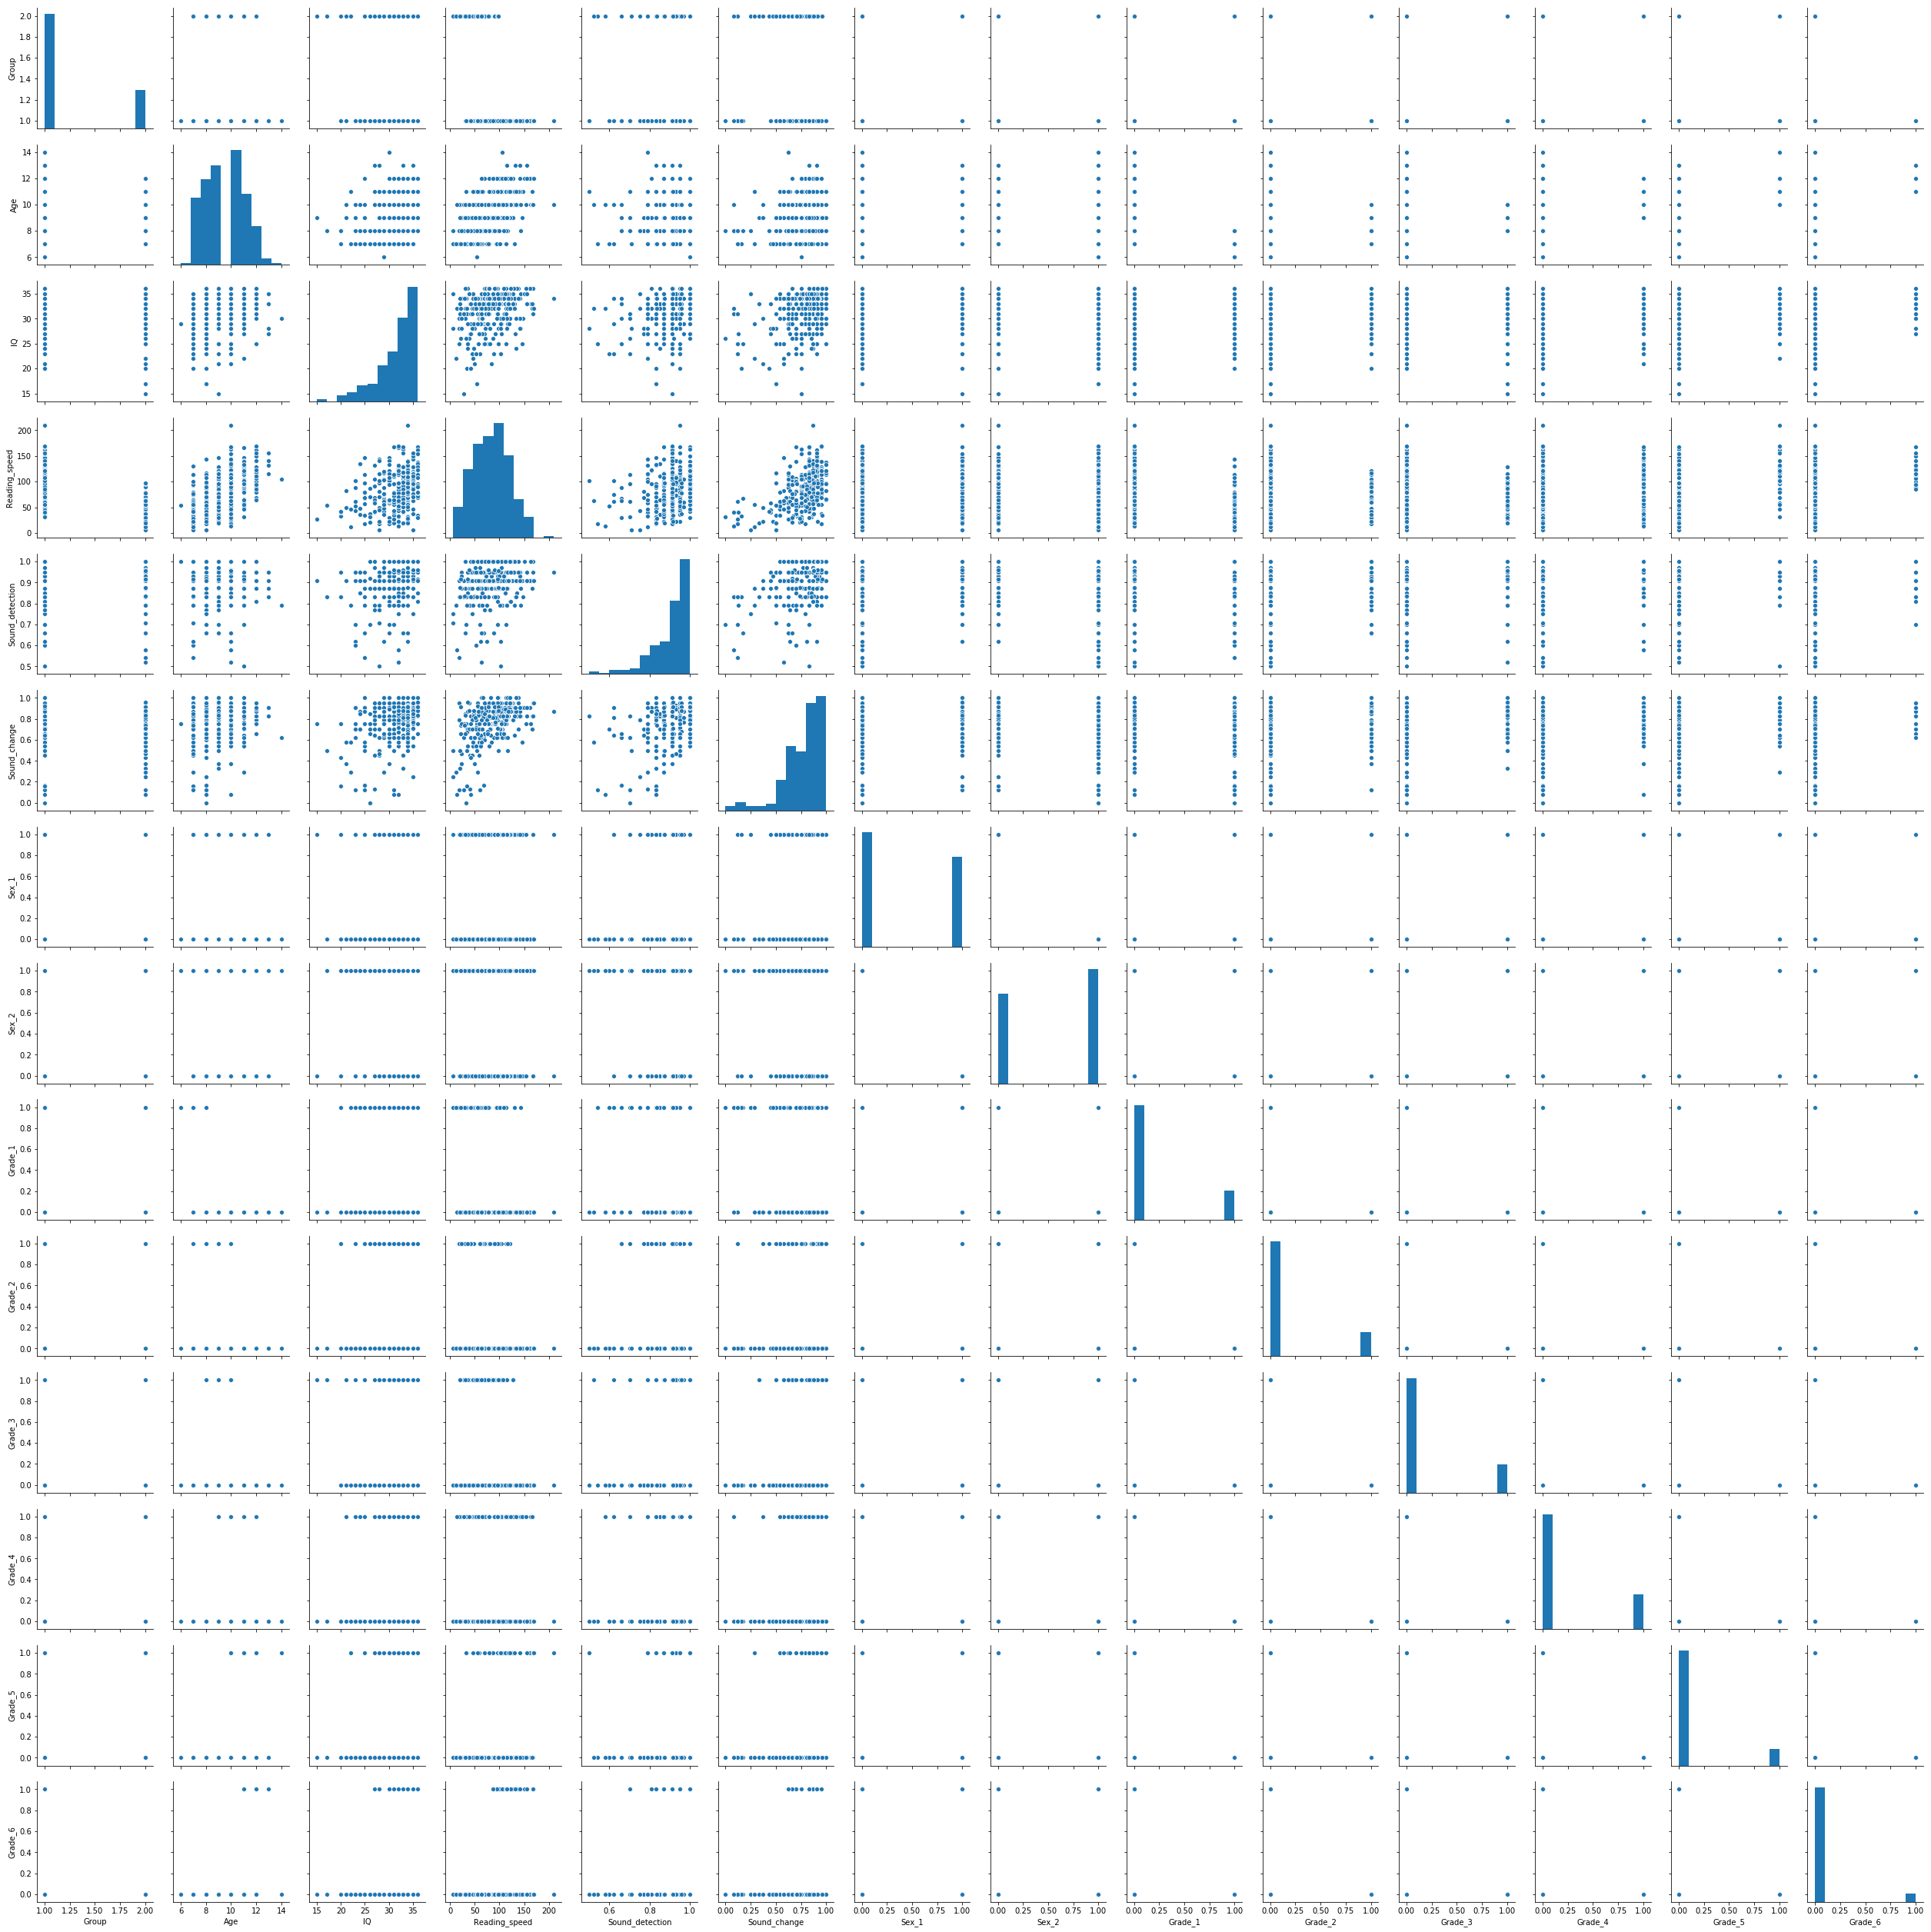

In [7]:
sns.pairplot(demo_org)
plt.show()

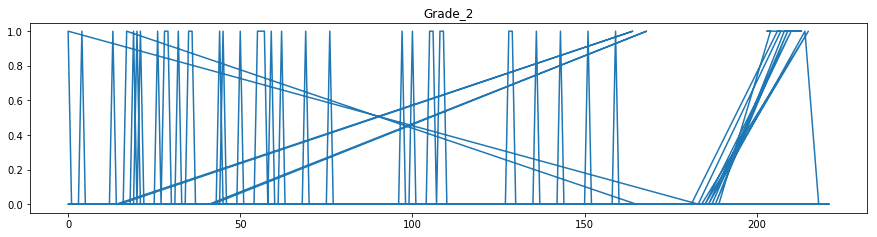

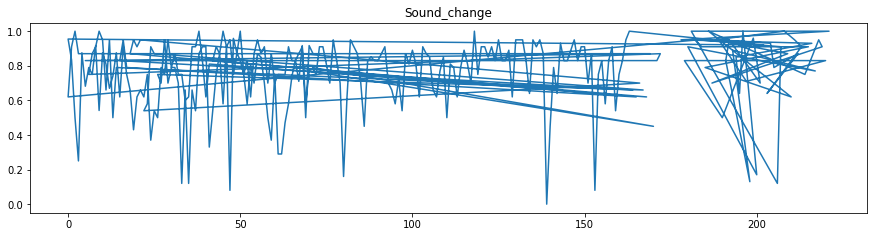

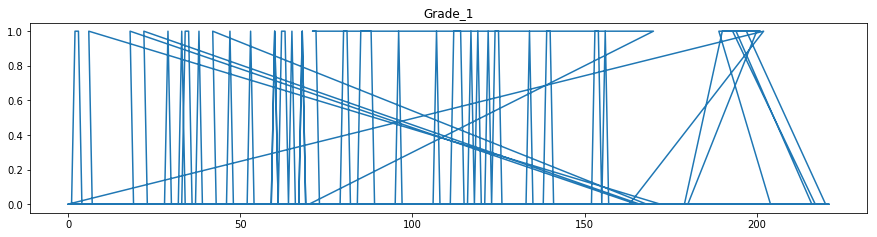

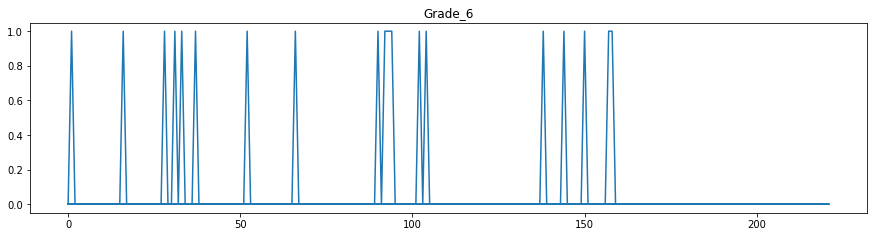

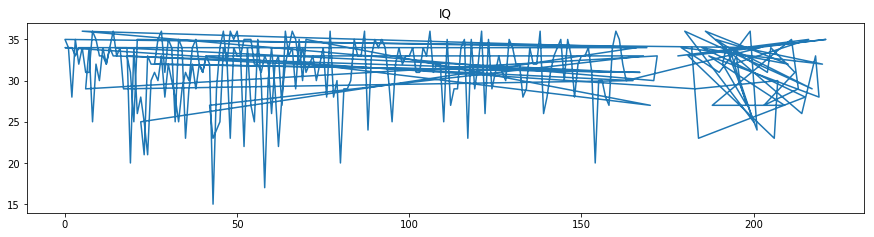

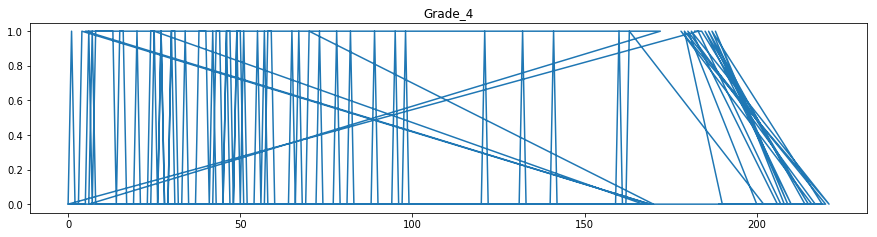

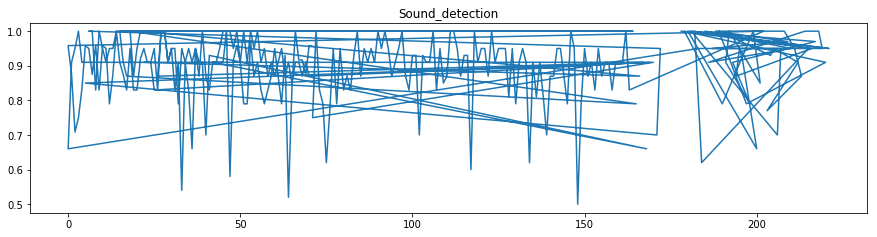

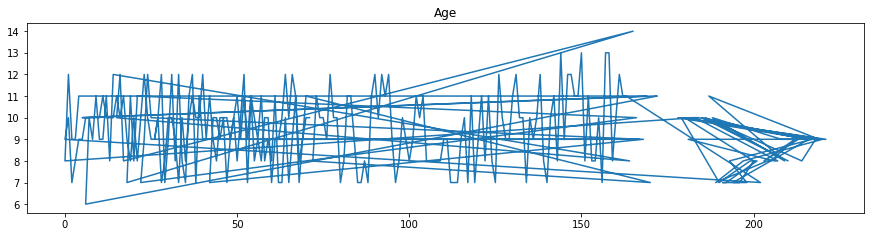

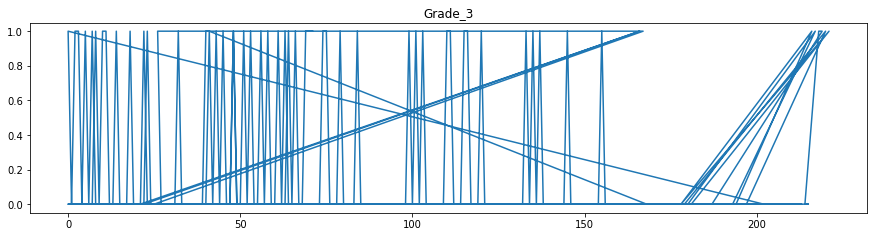

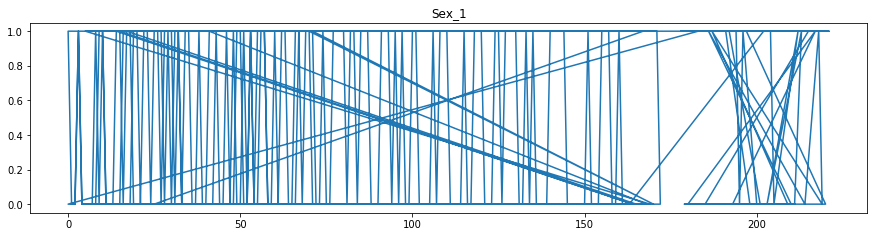

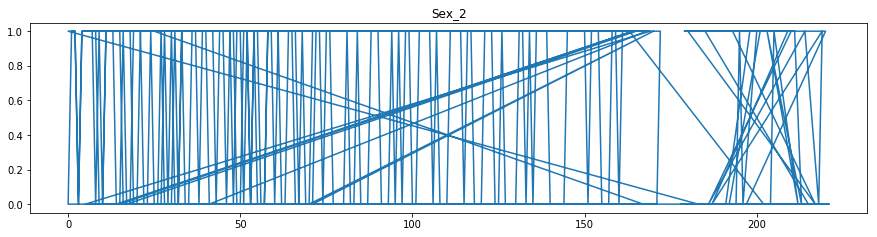

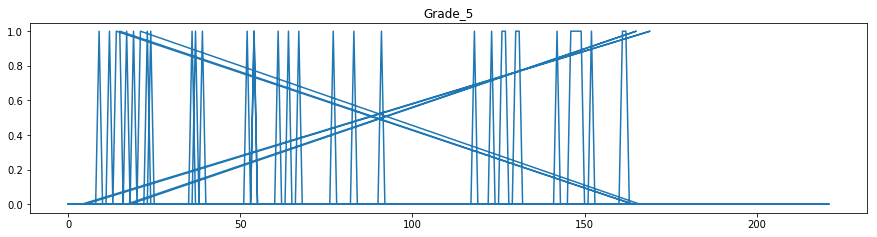

In [34]:
for feature in demo_features:
    _ = plt.figure(figsize=(15, 3.5))
    plt.plot(demo_org.loc[:, feature])
    plt.title(feature)
    plt.show()

In [127]:
ia_features

{'FIRST_FIXATION_DURATION',
 'FIRST_FIXATION_X',
 'FIRST_FIXATION_Y',
 'FIRST_RUN_TOTAL_READING_TIME',
 'FIRST_SACCADE_AMPLITUDE',
 'FIXATION_COUNT',
 'QUESTION_ACCURACY_-1',
 'QUESTION_ACCURACY_0',
 'QUESTION_ACCURACY_1',
 'REGRESSION_IN',
 'REGRESSION_OUT',
 'REGRESSION_OUT_FULL',
 'REGRESSION_PATH_DURATION',
 'SKIP_0',
 'SKIP_1',
 'TOTAL_READING_TIME'}

## IA report

In [126]:
ia_org, ia_x, ia_y, ia_features, ia_targets, ia_indicators = load_data(
    data_name="DD_ia", group="FClassification")


Cannot compare types 'ndarray(dtype=int64)' and 'str' 
 No missing values in Sentence_ID
Cannot compare types 'ndarray(dtype=int64)' and 'str' 
 No missing values in Word_Number
Cannot compare types 'ndarray(dtype=int64)' and 'str' 
 No missing values in QUESTION_ACCURACY
Cannot compare types 'ndarray(dtype=int64)' and 'str' 
 No missing values in FIXATION_COUNT
Cannot compare types 'ndarray(dtype=int64)' and 'str' 
 No missing values in SKIP
Cannot compare types 'ndarray(dtype=int64)' and 'str' 
 No missing values in TOTAL_READING_TIME
Cannot compare types 'ndarray(dtype=int64)' and 'str' 
 No missing values in Sentence_ID
Cannot compare types 'ndarray(dtype=int64)' and 'str' 
 No missing values in Word_Number
Cannot compare types 'ndarray(dtype=int64)' and 'str' 
 No missing values in QUESTION_ACCURACY
Cannot compare types 'ndarray(dtype=int64)' and 'str' 
 No missing values in FIXATION_COUNT
Cannot compare types 'ndarray(dtype=int64)' and 'str' 
 No missing values in SKIP
Cannot com

In [18]:
type(ia_y[0][0]), type(ia_x[0][0])

(numpy.int64, numpy.float64)

In [62]:
ia_org.head()

Group  SubjectID  Sentence_ID  Word_Number  FIXATION_COUNT  \
37718      1  108_norm2            4            3               1   
37719      1  108_norm2            4            4               3   
37720      1  108_norm2            4            5               1   
37721      1  108_norm2            4            6               2   
37722      1  108_norm2            4            7               4   

       TOTAL_READING_TIME FIRST_FIXATION_DURATION FIRST_FIXATION_X  \
37718                 133                     133              294   
37719                 366                      62            346.3   
37720                 198                     198            567.8   
37721                  66                      25            733.3   
37722                 256                      69            866.8   

      FIRST_FIXATION_Y FIRST_RUN_TOTAL_READING_TIME FIRST_SACCADE_AMPLITUDE  \
37718              532                          133                    3.53   
37719            544.1                          366                    1.79   
37720            549.7                          198                    5.15   
37721            546.3                           66                     5.7   
37722            540.4                          256                    4.57   

      REGRESSION_IN REGRESSION_OUT REGRESSION_OUT_FULL  \
37718             0              0                   0   
37719             0              0                   0   
37720             0              0                   0   
37721             0              0                   0   
37722             0              0                   0   

      REGRESSION_PATH_DURATION  QUESTION_ACCURACY_-1  QUESTION_ACCURACY_0  \
37718                      133                     0                    0   
37719                      366                     0                    0   
37720                      198                     0                    0   
37721                       66                     0                    0   
37722                      256                     0                    0   

       QUESTION_ACCURACY_1  SKIP_0  SKIP_1  
37718                    1       1       0  
37719                    1       1       0  
37720                    1       1       0  
37721                    1       1       0  
37722                    1       1       0

In [20]:
ia_x.shape, ia_y.shape, ia_org.shape

((50449, 16), (50449, 1), (50449, 20))

In [ ]:
# sns.pairplot(ia_org)
# plt.show()

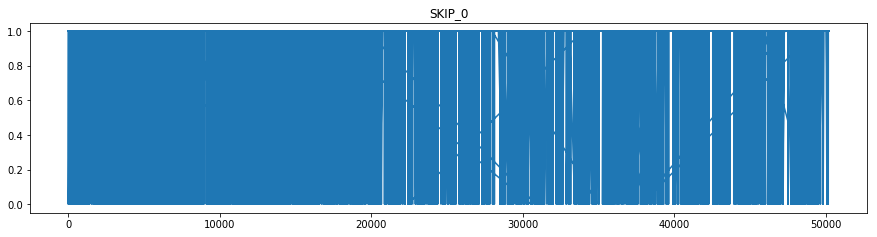

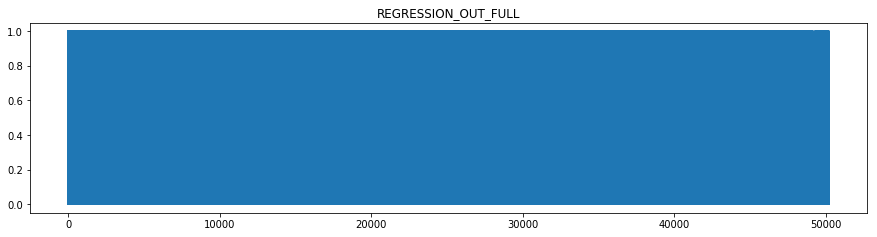

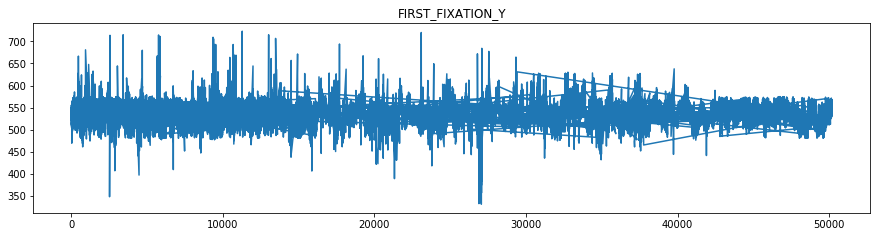

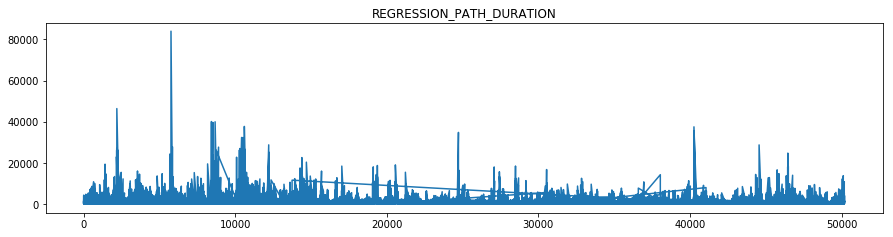

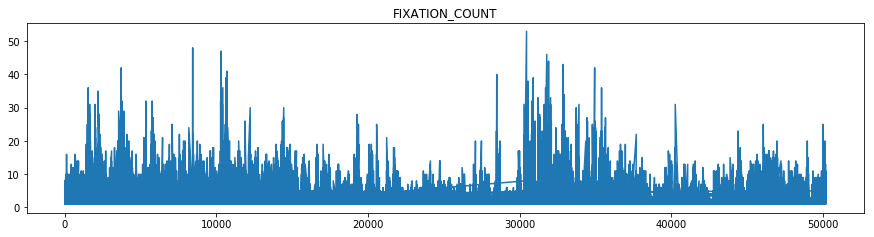

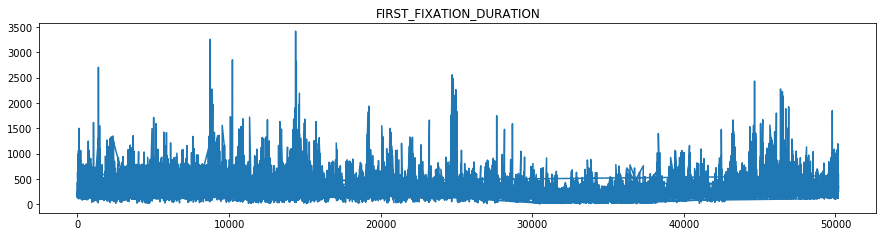

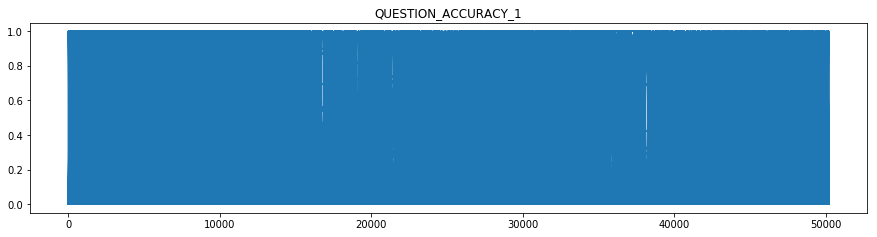

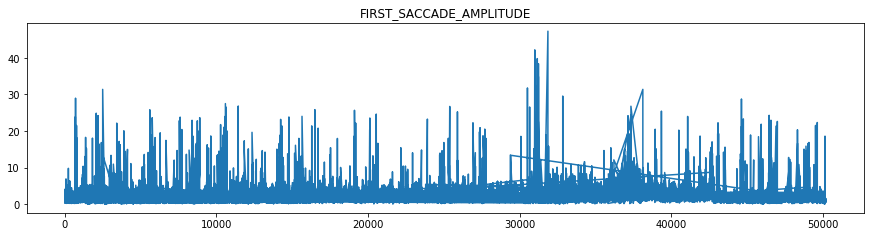

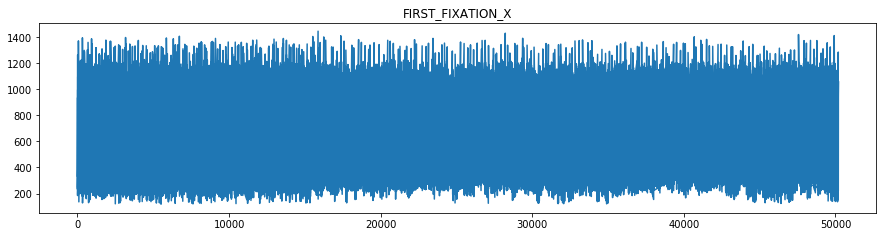

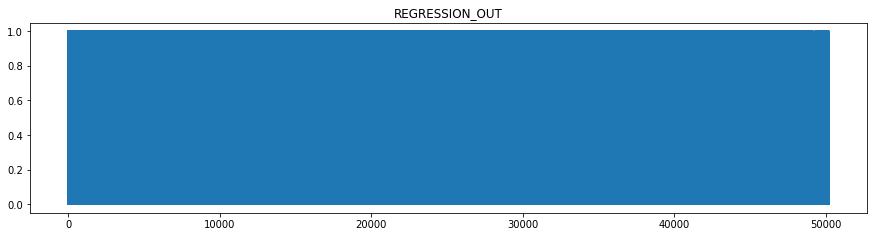

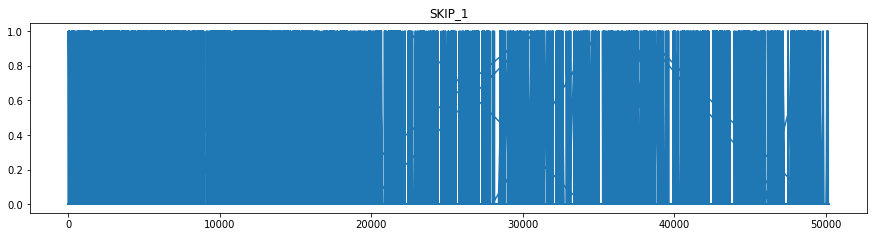

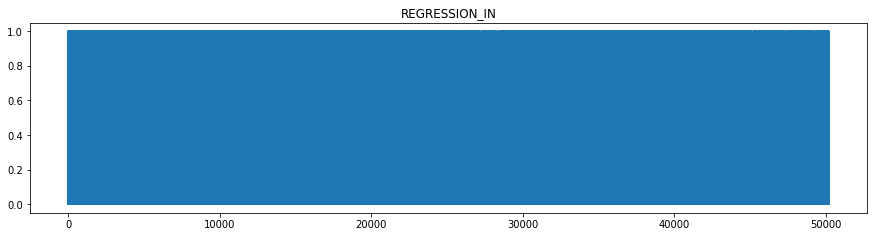

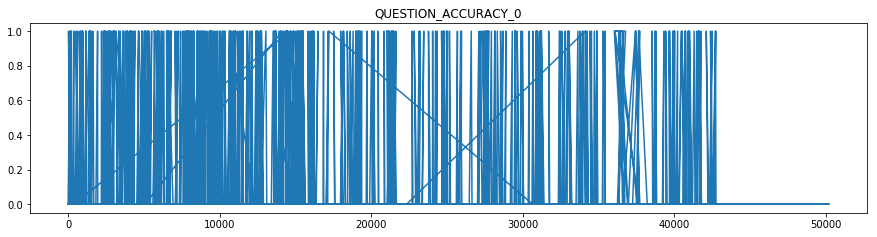

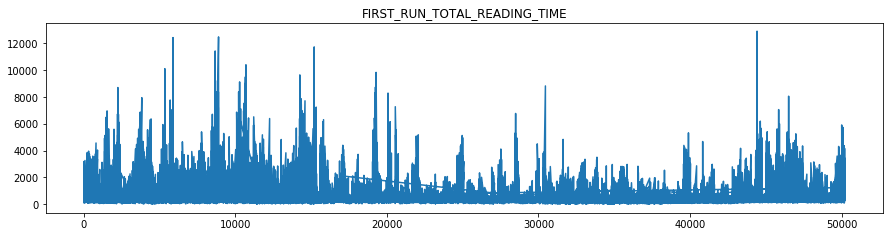

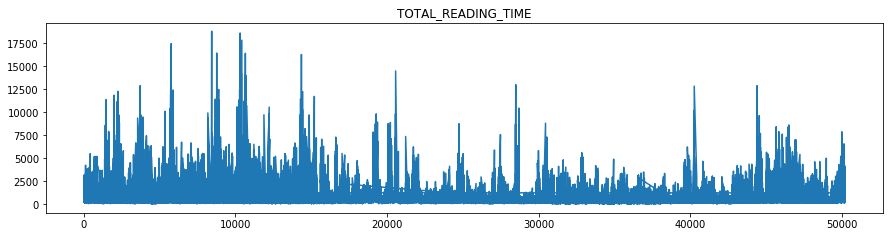

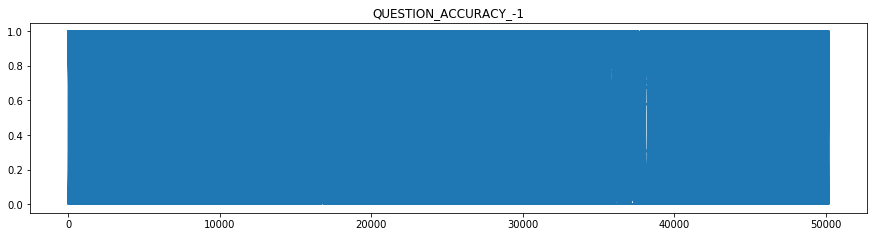

In [24]:
for feature in ia_features:
    _ = plt.figure(figsize=(15, 3.5))
    plt.plot(ia_org.loc[:, feature])
    plt.title(feature)
    plt.show()

## Fixation report 

In [26]:
fix_org, fix_x, fix_y, fix_features, fix_targets, fix_indicators = load_data(
    data_name="DD_fix", group="FClassification")


Cannot compare types 'ndarray(dtype=int64)' and 'str' 
 No missing values in Sentence_ID
Cannot compare types 'ndarray(dtype=int64)' and 'str' 
 No missing values in Word_Number
Cannot compare types 'ndarray(dtype=int64)' and 'str' 
 No missing values in FIX_X
Cannot compare types 'ndarray(dtype=int64)' and 'str' 
 No missing values in FIX_Y
Cannot compare types 'ndarray(dtype=int64)' and 'str' 
 No missing values in FIX_DURATION
Cannot compare types 'ndarray(dtype=int64)' and 'str' 
 No missing values in Sentence_ID
Cannot compare types 'ndarray(dtype=int64)' and 'str' 
 No missing values in Word_Number
Cannot compare types 'ndarray(dtype=float64)' and 'str' 
 No missing values in FIX_X
Cannot compare types 'ndarray(dtype=float64)' and 'str' 
 No missing values in FIX_Y
Cannot compare types 'ndarray(dtype=int64)' and 'str' 
 No missing values in FIX_DURATION
Check data for NaNs or Inf: 
 x:  (array([], dtype=int64), array([], dtype=int64)) (array([], dtype=int64), array([], dtype=int6

In [27]:
type(fix_y[0][0]), type(fix_x[0][0])

(numpy.int64, numpy.float64)

In [28]:
fix_org.iloc[:4, :]

Group  SubjectID  Sentence_ID  Word_Number    FIX_X    FIX_Y  \
114411      1  108_norm2            4            2  18220.0  52390.0   
114412      1  108_norm2            4            3  29400.0  53200.0   
114413      1  108_norm2            4            4  34630.0  54410.0   
114414      1  108_norm2            4            4  45730.0  54340.0   

        FIX_DURATION  
114411           180  
114412           133  
114413            62  
114414           164

In [29]:
fix_x.shape, fix_y.shape, fix_org.shape

((202298, 3), (202298, 1), (202298, 7))

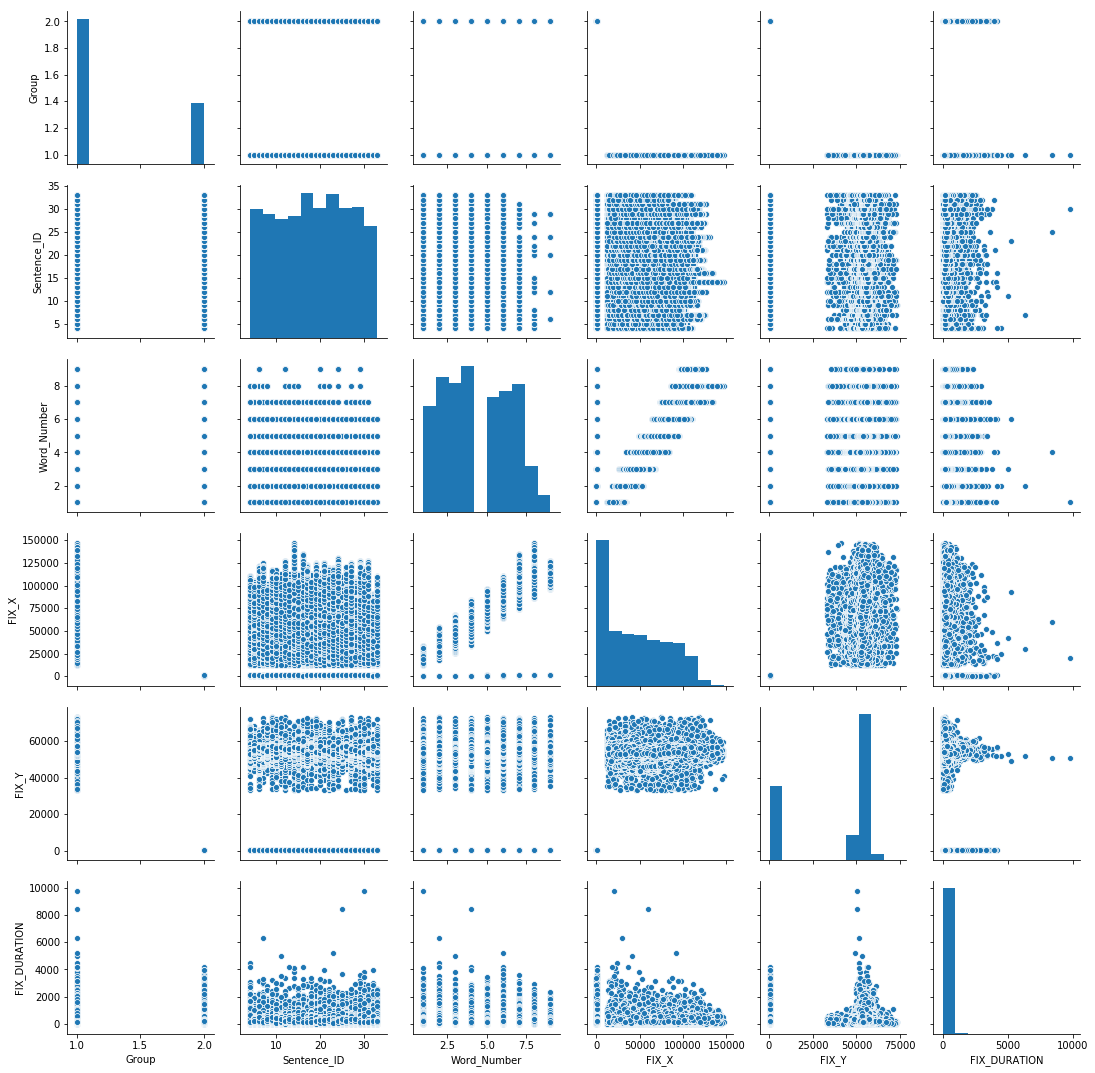

In [30]:
sns.pairplot(fix_org)
plt.show()

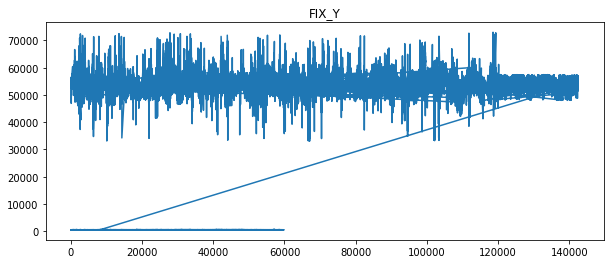

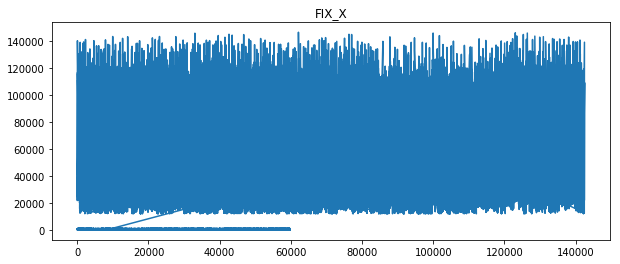

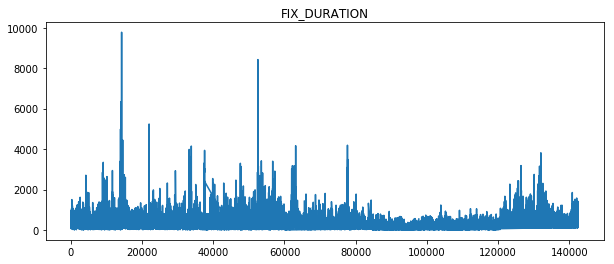

In [31]:
for feature in fix_features:
    _ = plt.figure(figsize=(10, 4))
    plt.plot(fix_org.loc[:, feature])
    plt.title(feature)
    plt.show()

# Proper plots

In [63]:
subj_ids = set(demo_org.loc[:, "SubjID"])
sentences = set(ia_org.loc[:, "Sentence_ID"])

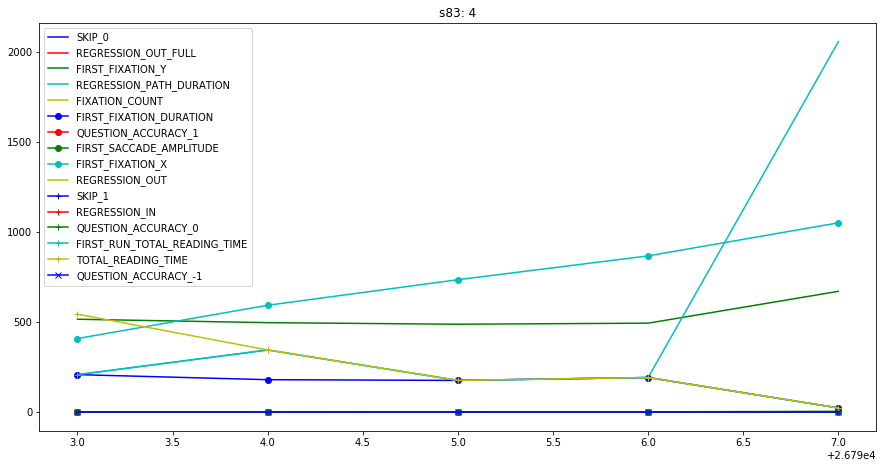

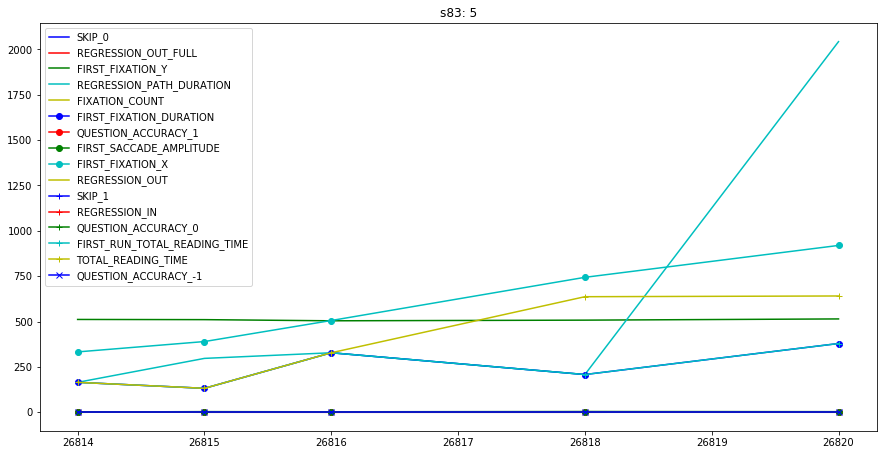

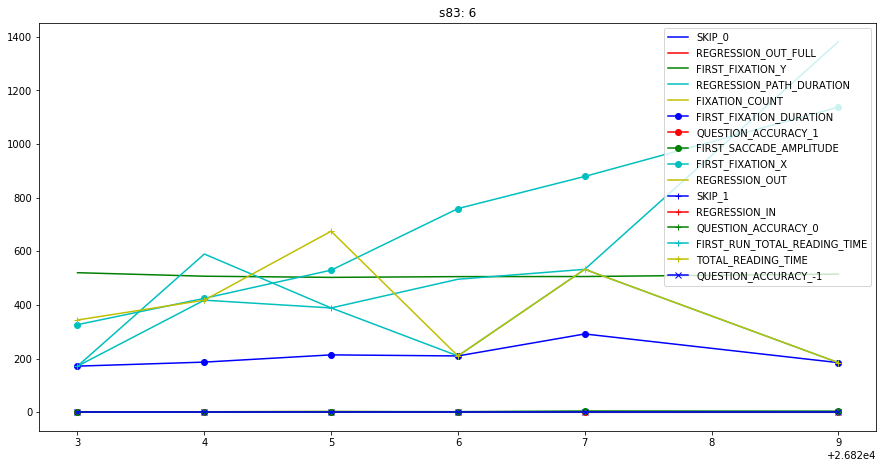

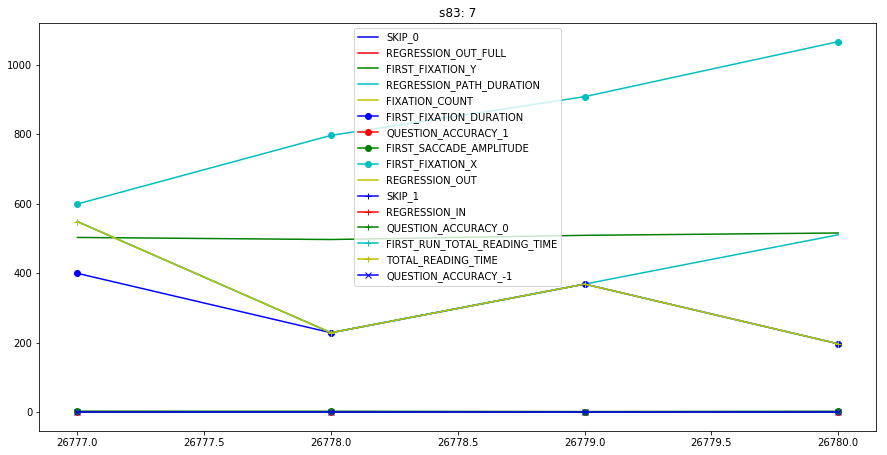

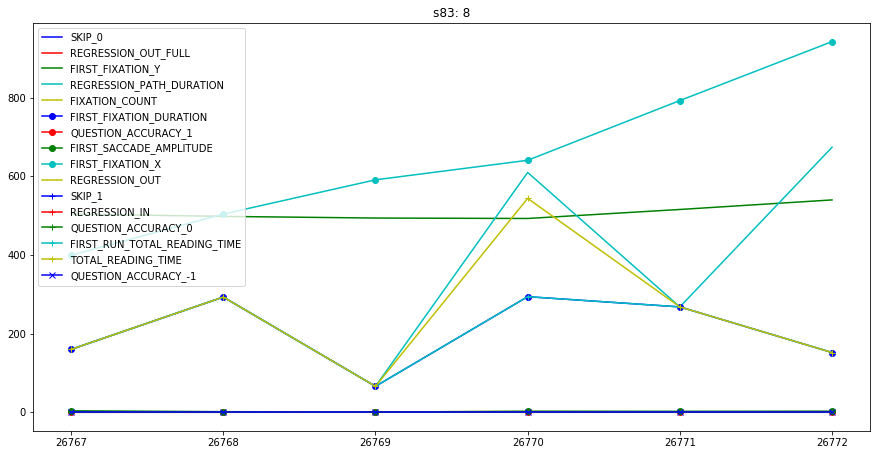

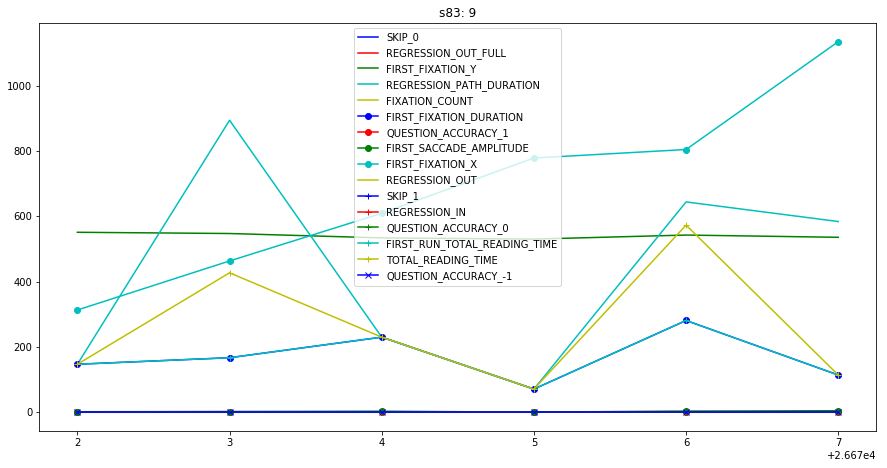

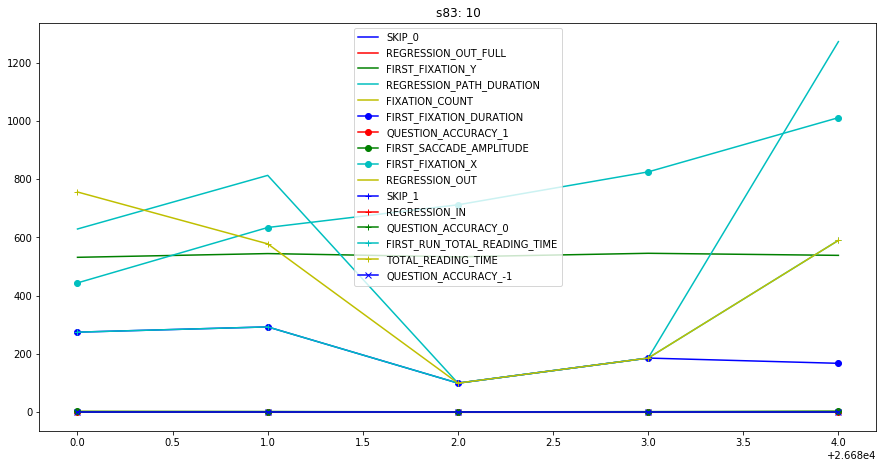

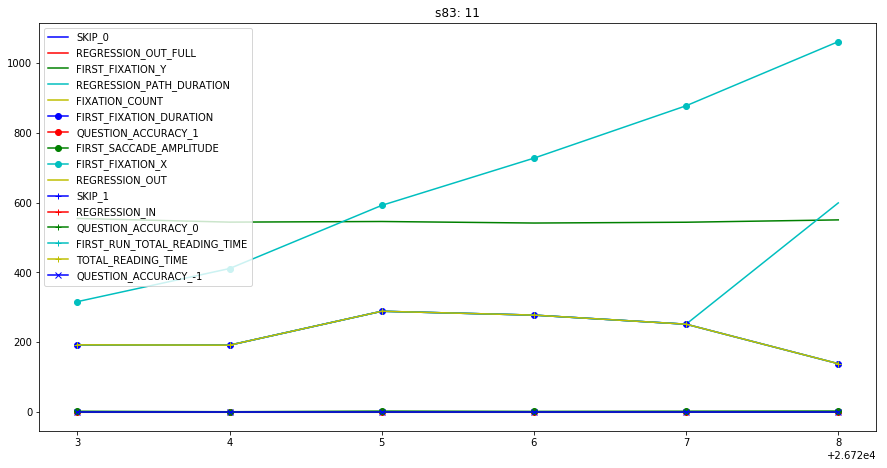

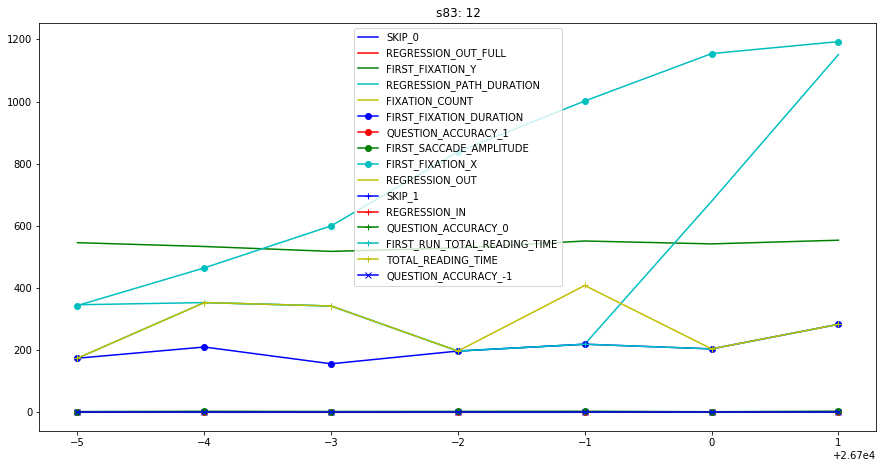

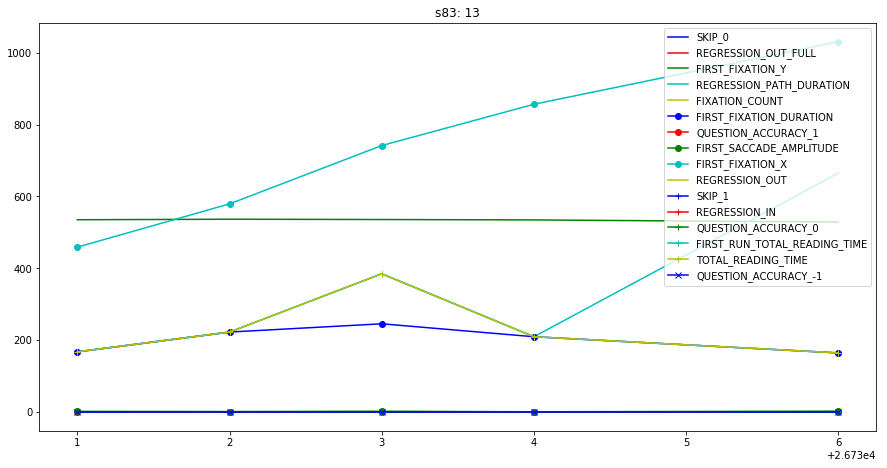

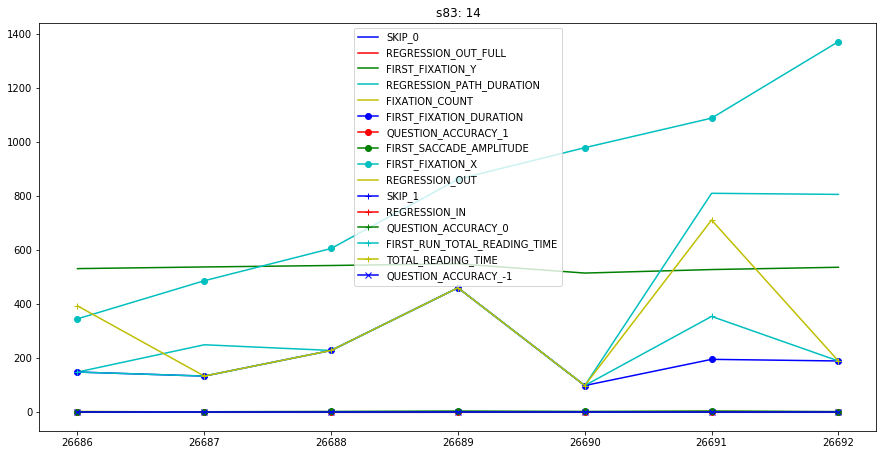

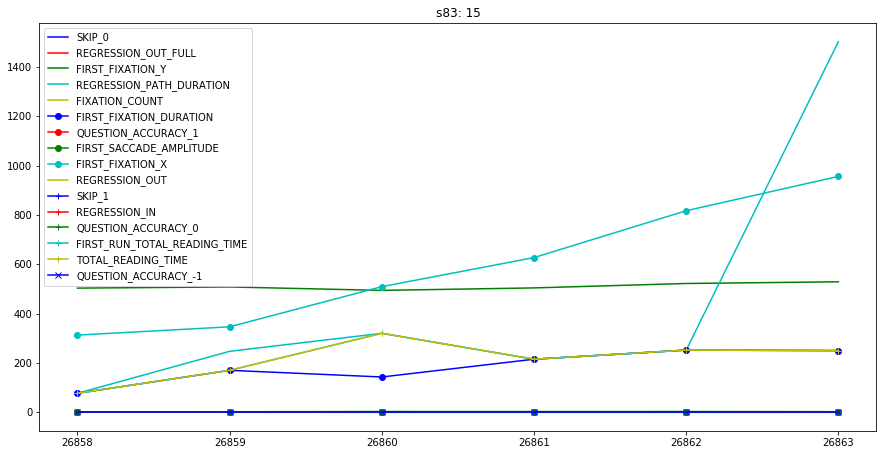

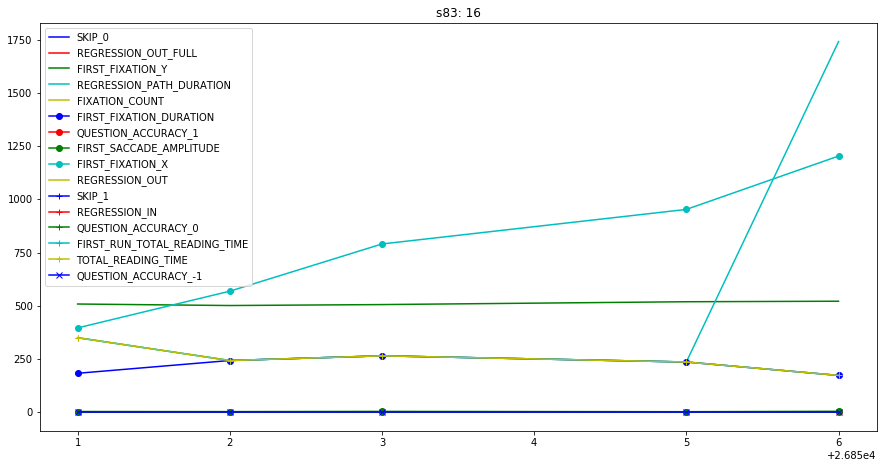

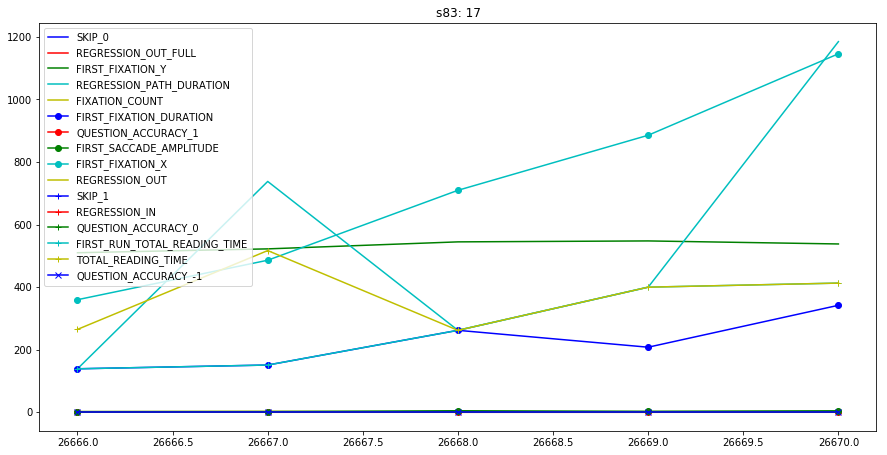

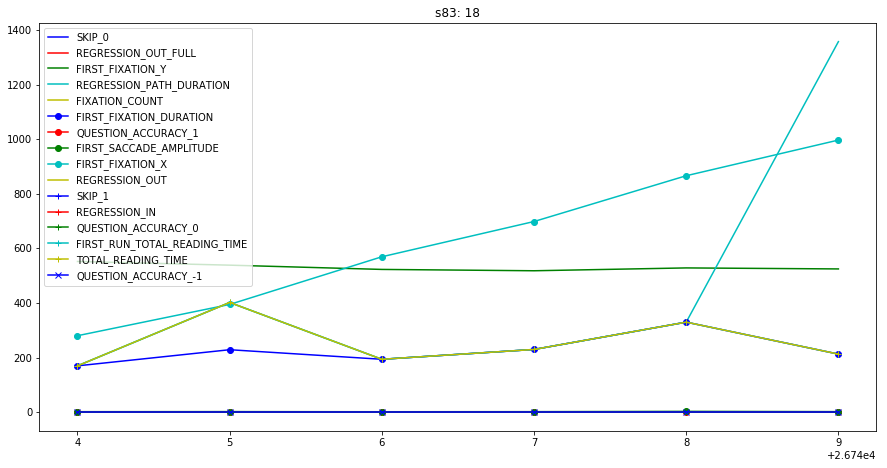

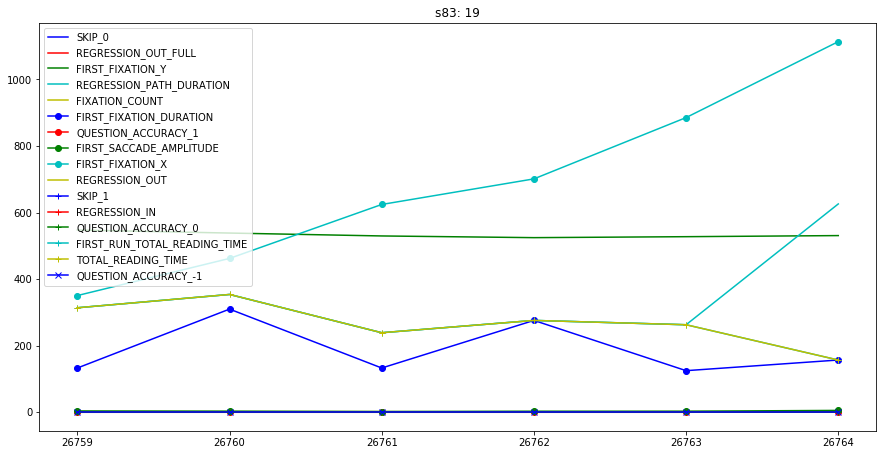

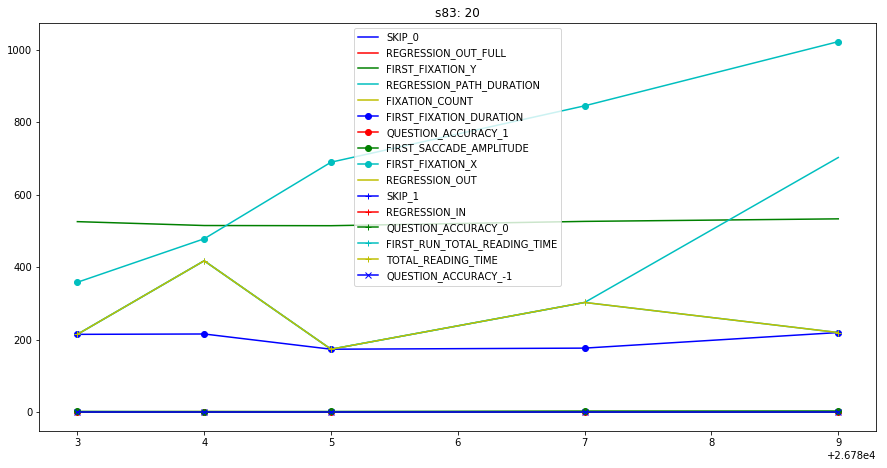

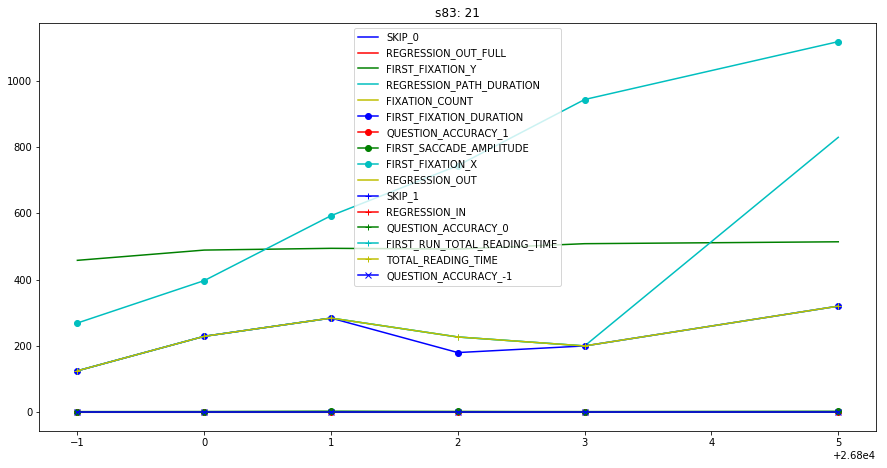

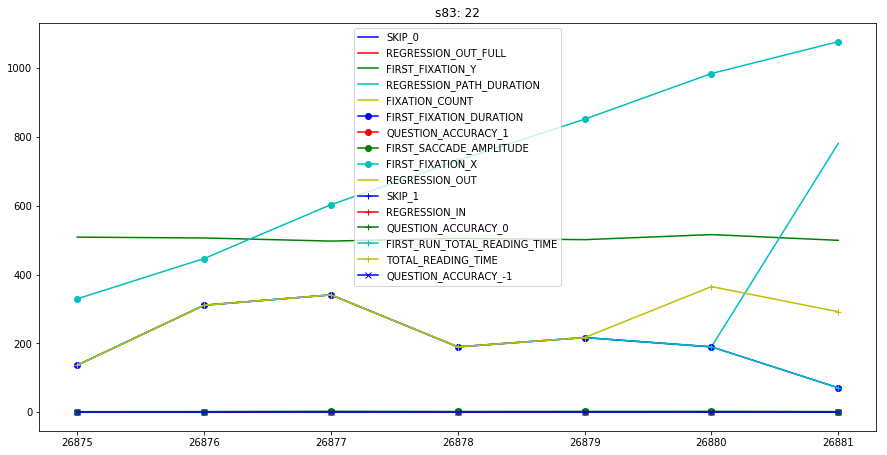

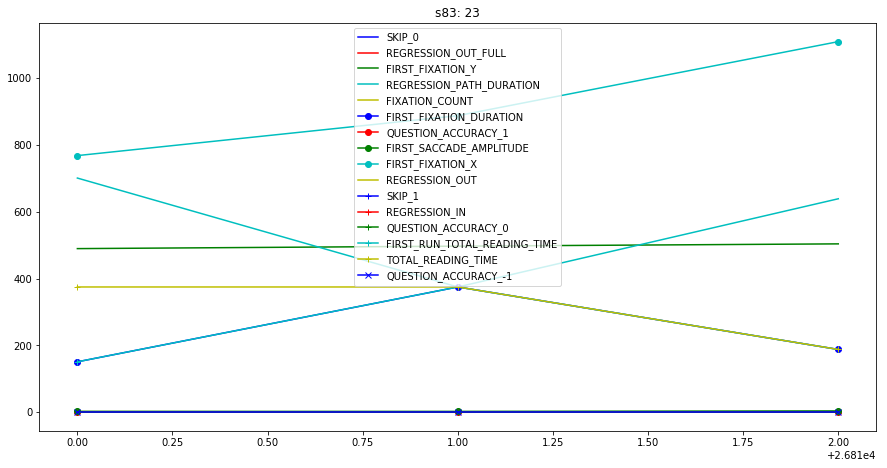

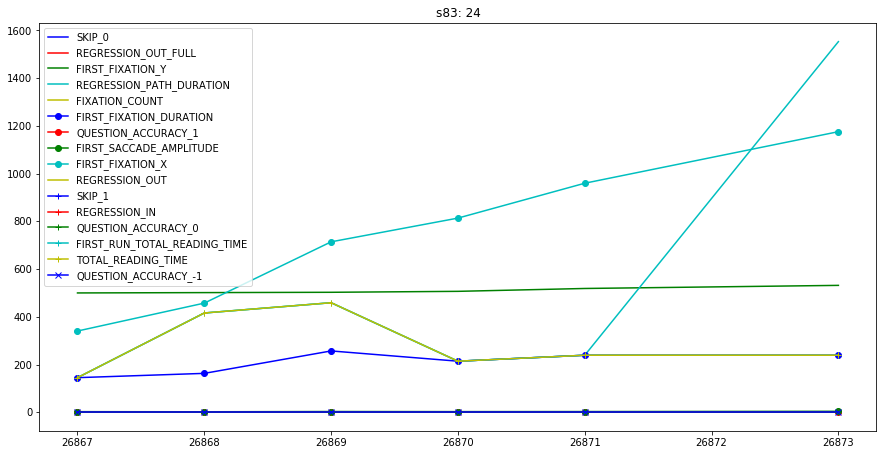

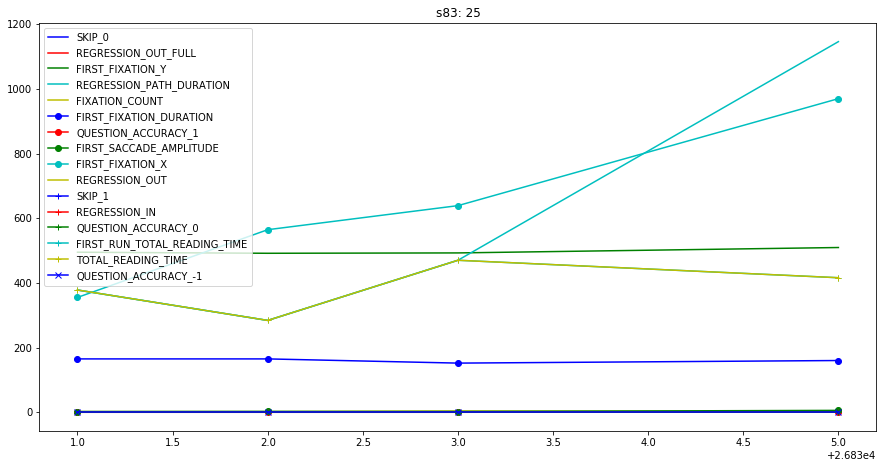

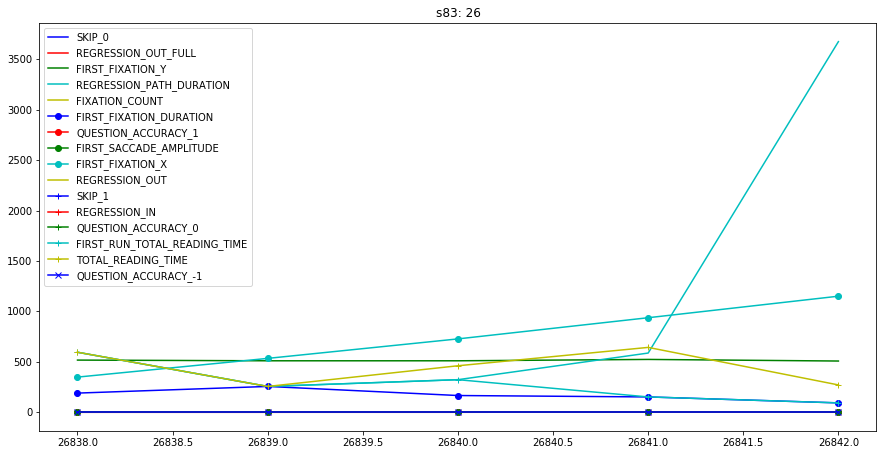

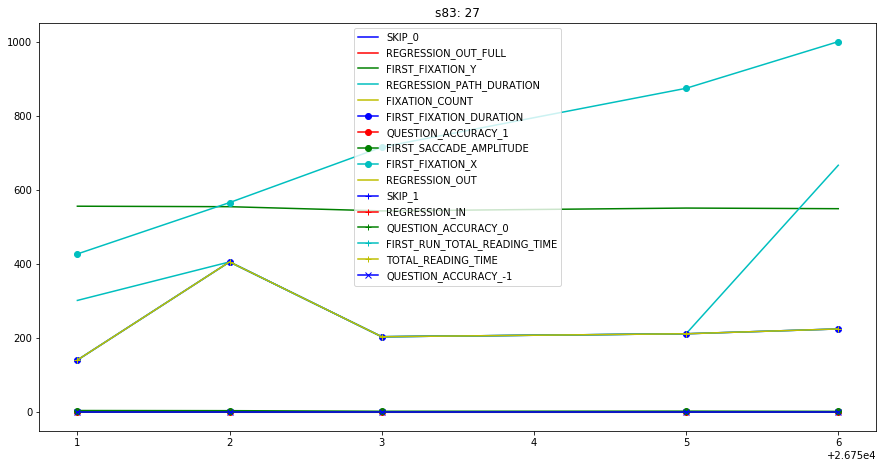

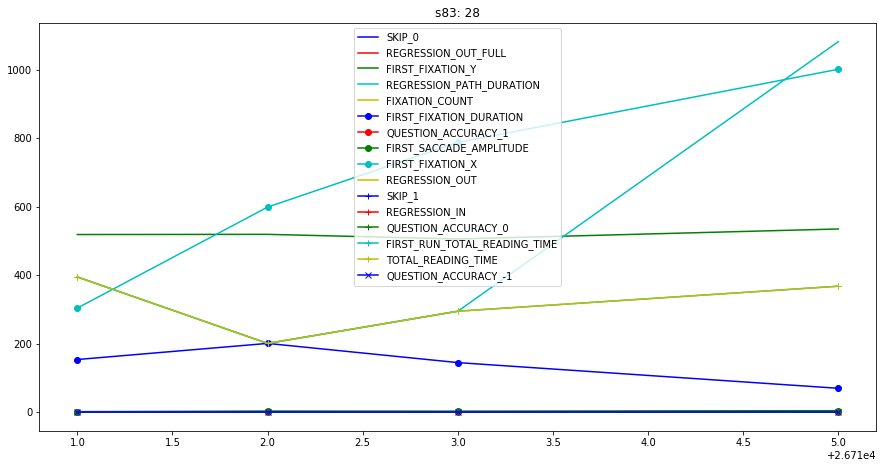

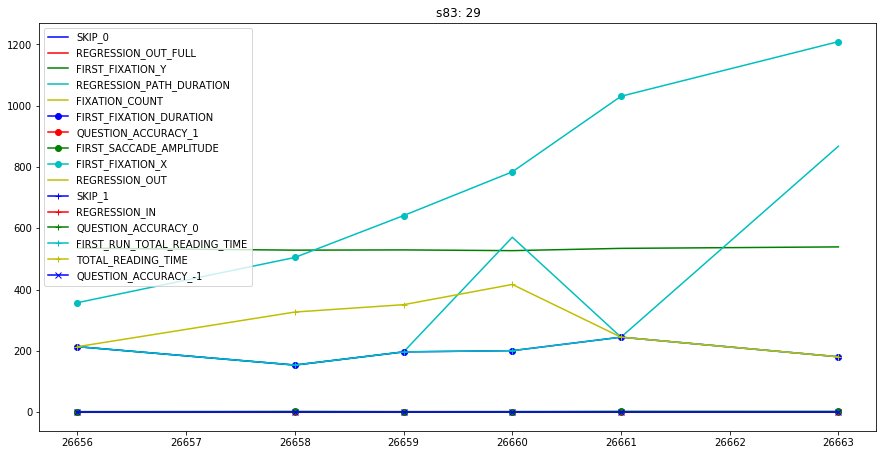

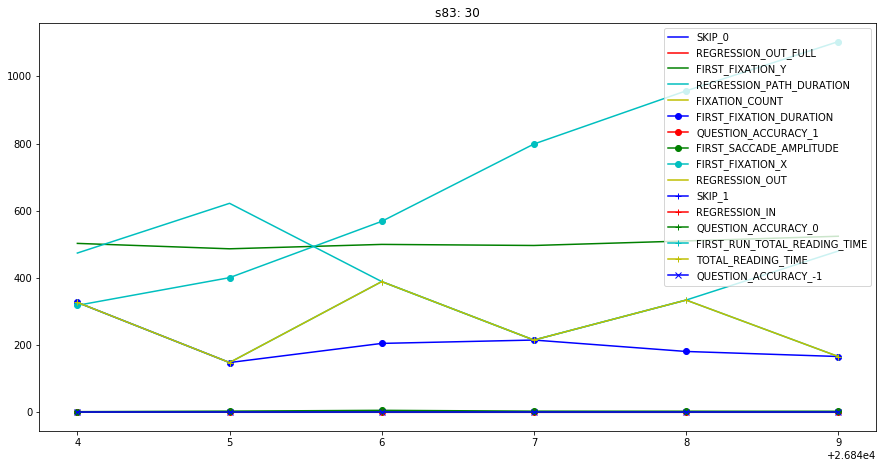

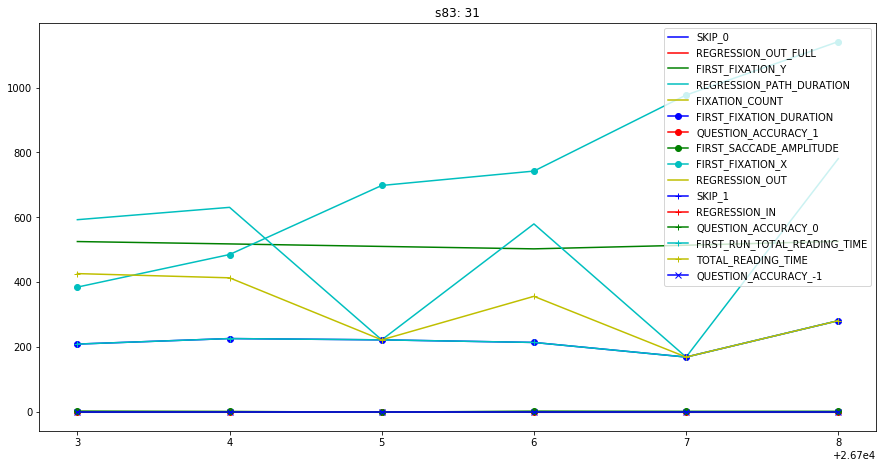

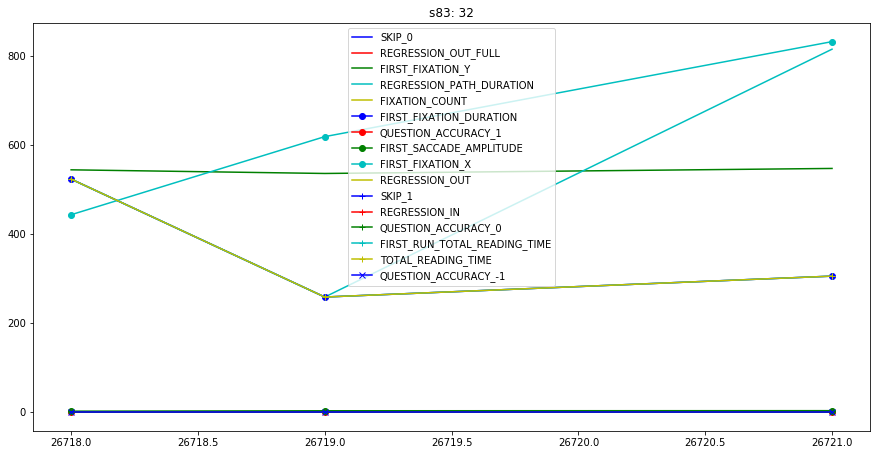

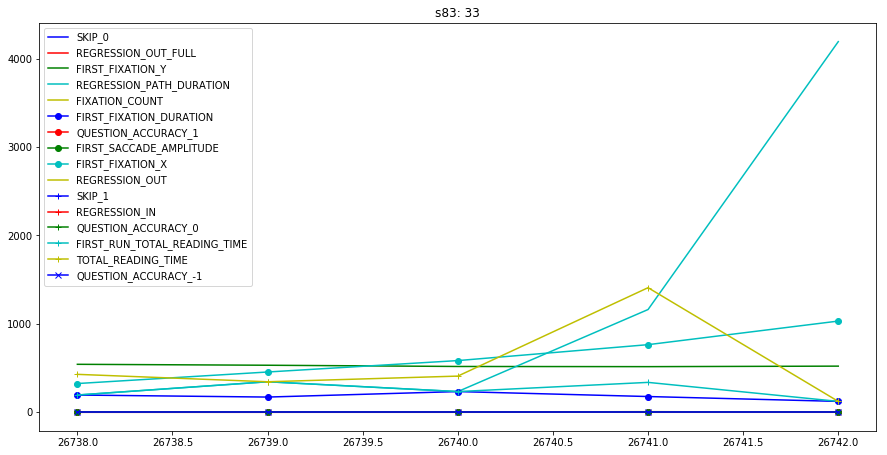

In [138]:
ia_features = list(ia_features)
subj_id = "s83"
for sentnece in sentences:
    _ = plt.figure(figsize=(15, 7.5))
    x = ia_org.loc[(ia_org["SubjectID"] == subj_id) &
                   (ia_org["Sentence_ID"] == sentnece)
                  ]
    labels = [f for f in ia_features]
    colors = ["b-", "r-", "g-", "c-", "y-", 
              "b-o", "r-o", "g-o", "c-o", "y-",
              "b-+", "r-+", "g-+", "c-+", "y-+", 
              "b-x", "r-x", "g-x", "c-x", "y-x"
              
             ]
    
    for f in range(len(ia_features)):
        plt.plot(x[ia_features[f]], colors[f])
    
    plt.title(subj_id + ": " + str(sentnece))
    plt.legend()
    plt.show()
    

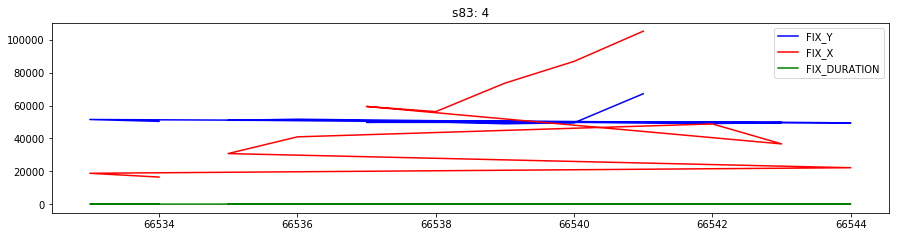

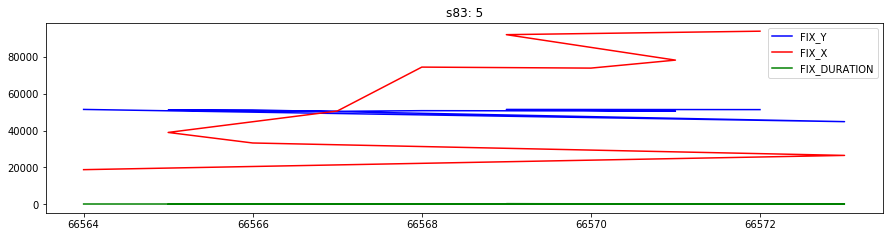

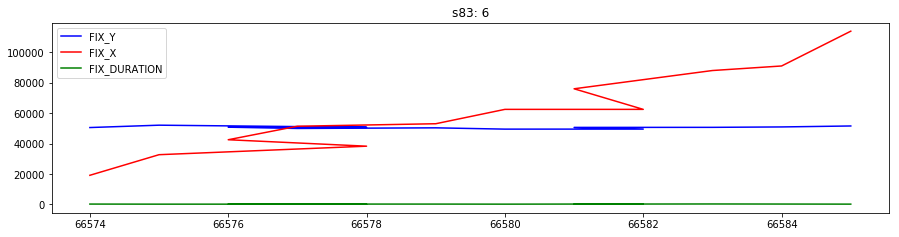

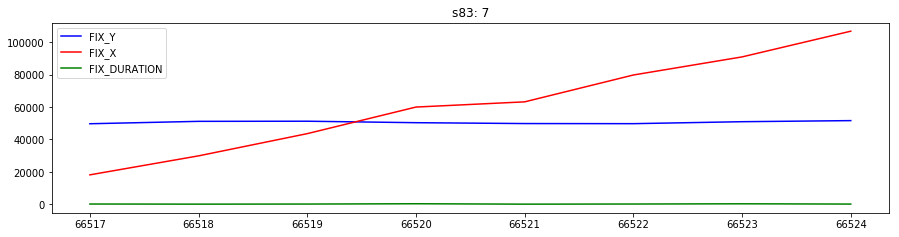

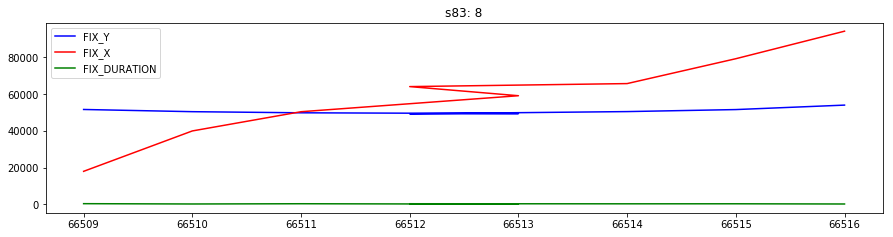

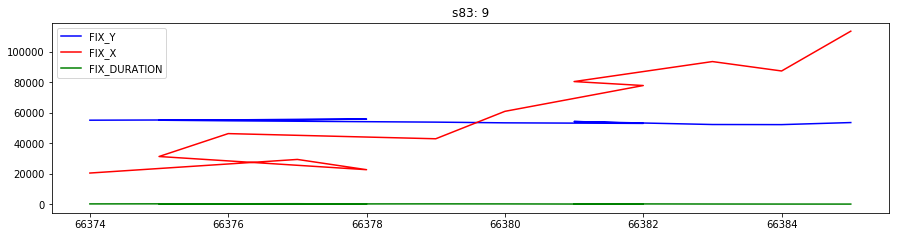

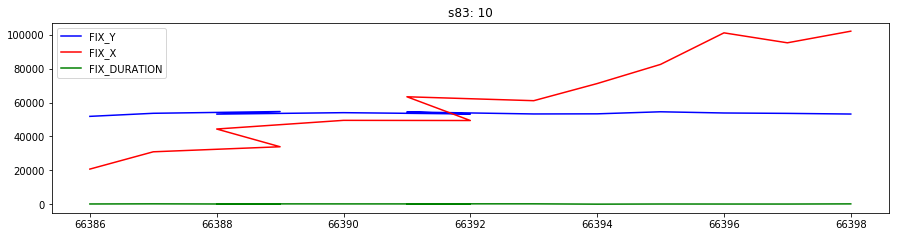

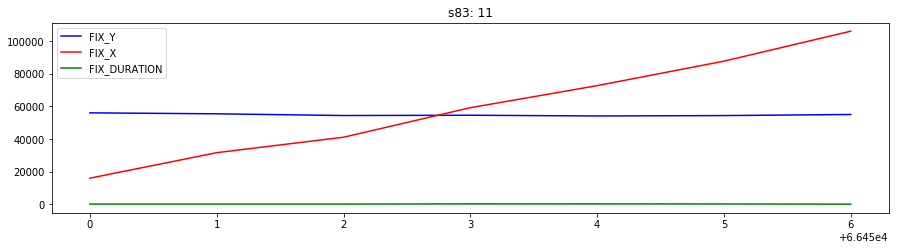

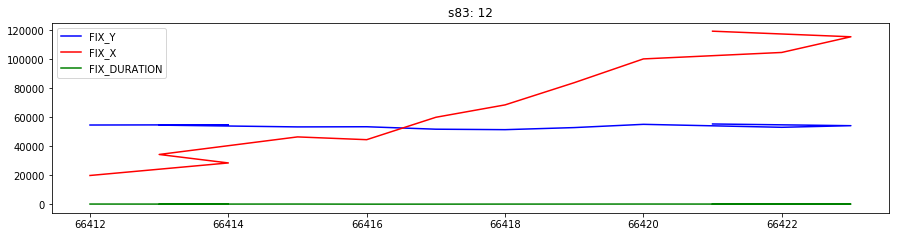

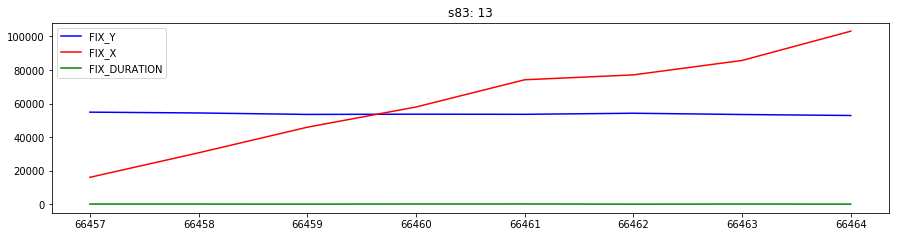

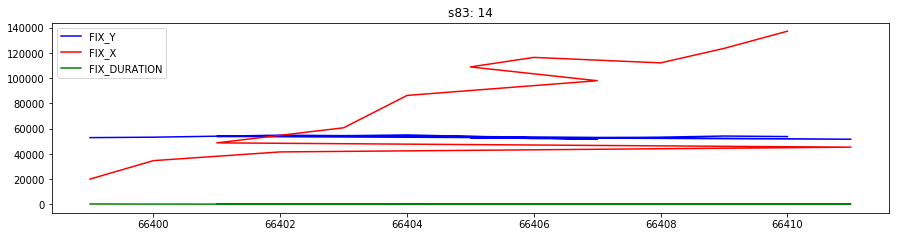

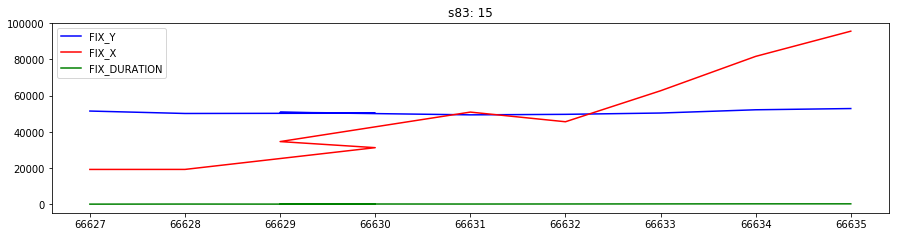

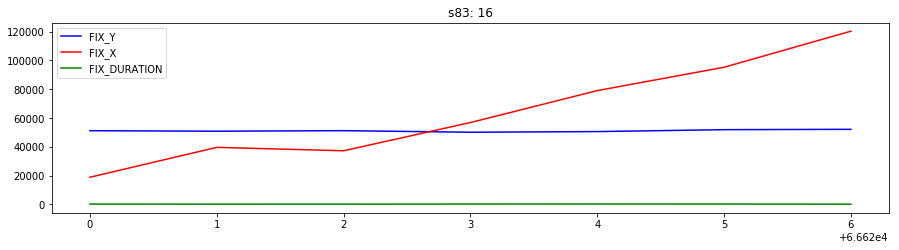

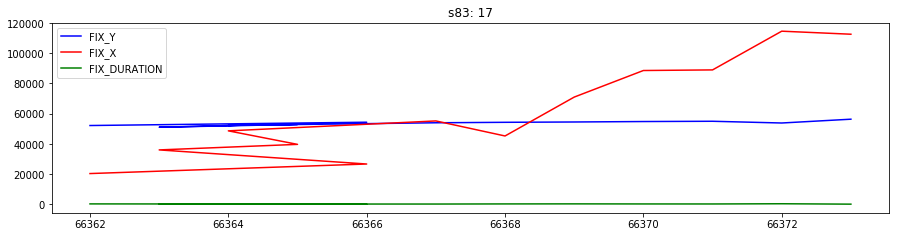

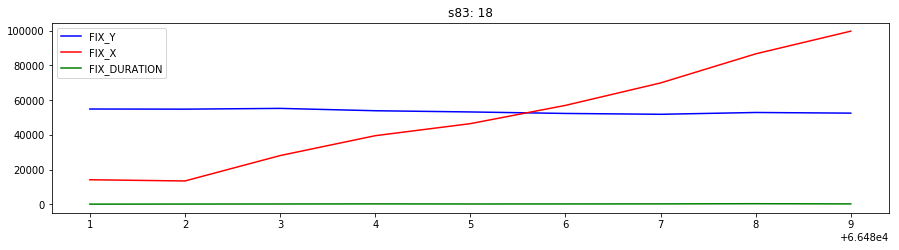

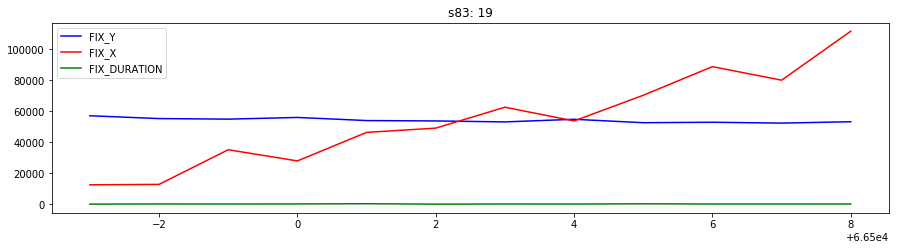

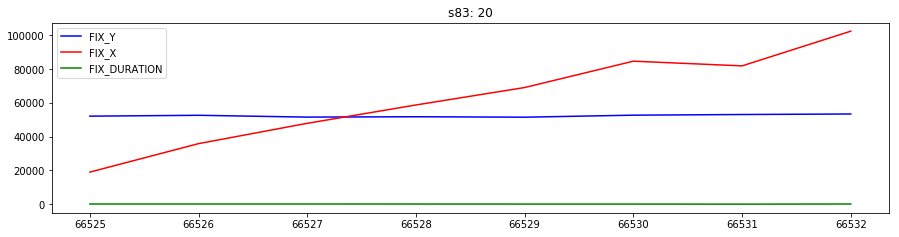

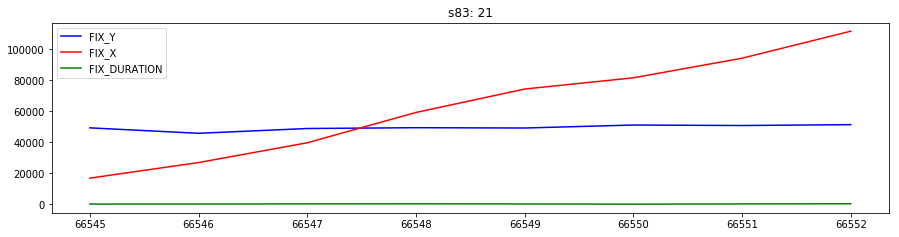

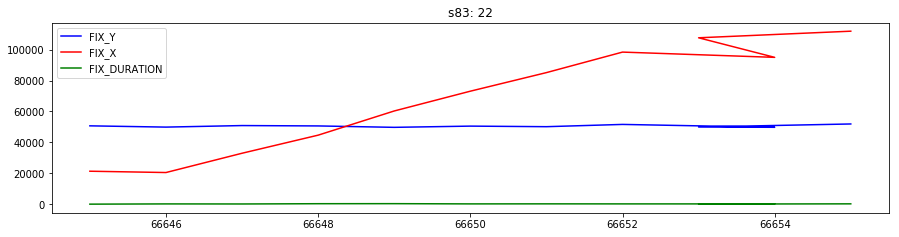

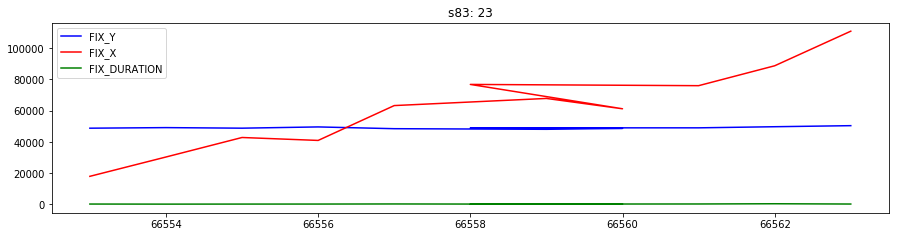

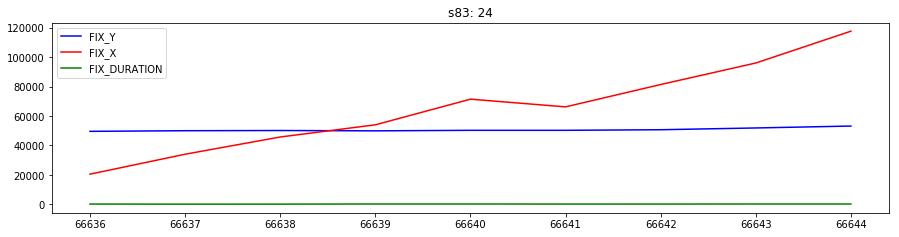

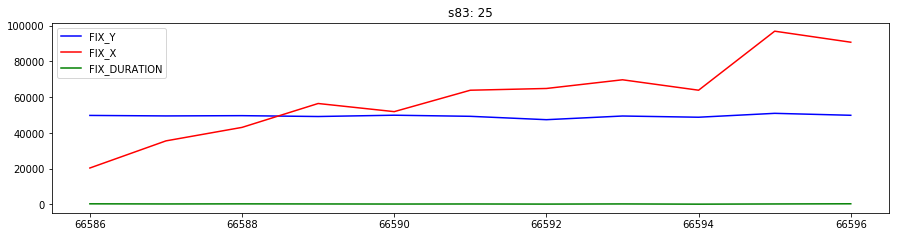

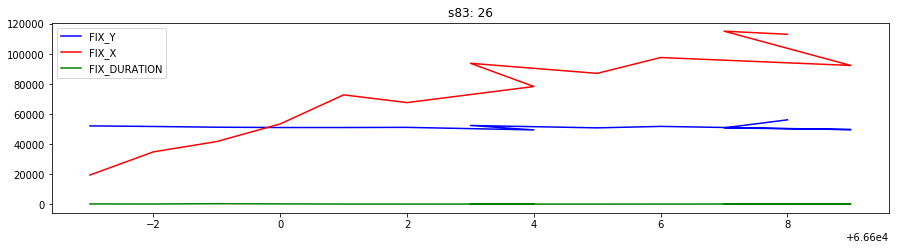

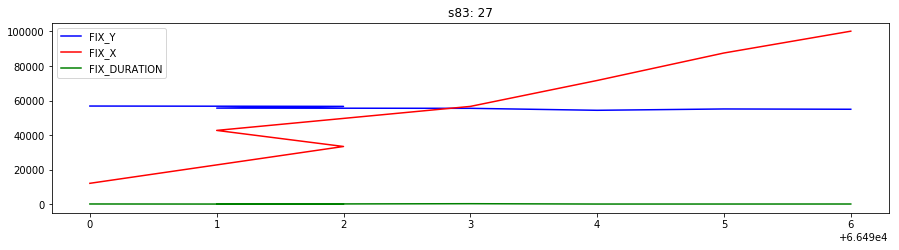

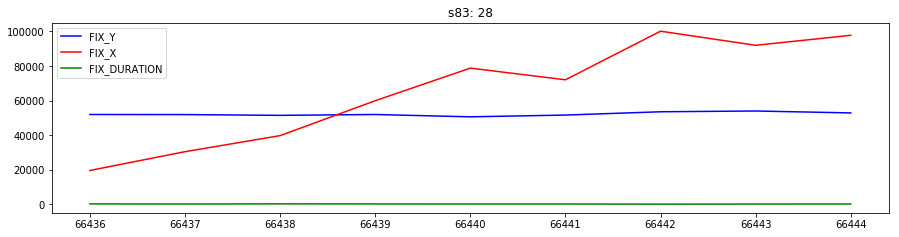

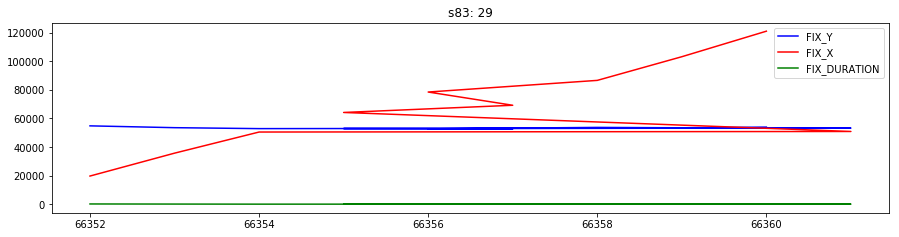

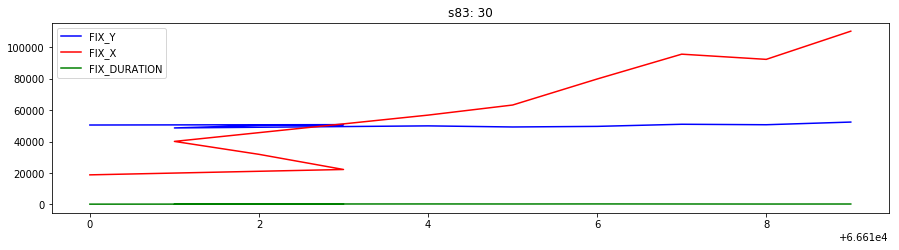

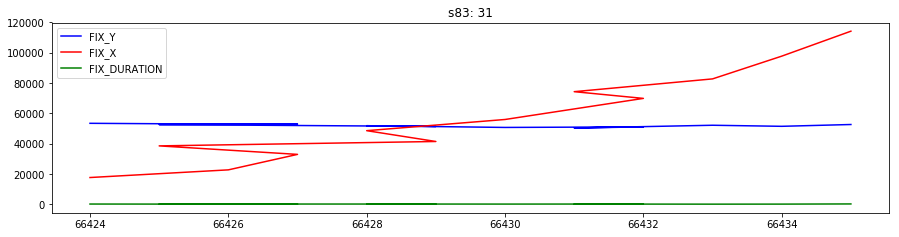

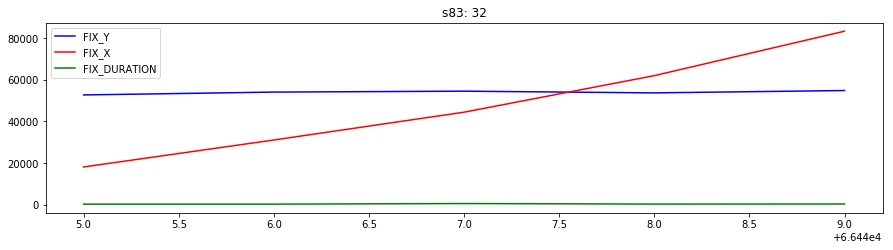

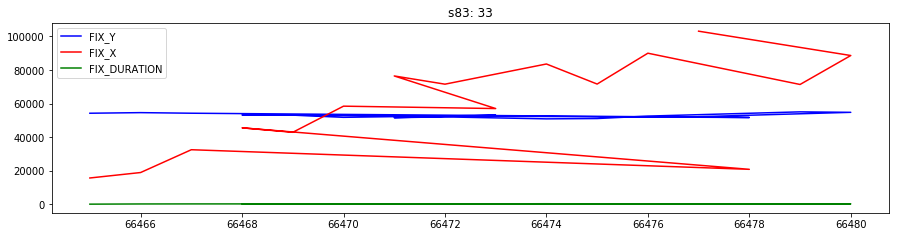

In [140]:
fix_features = list(fix_features)
subj_id = "s83"
for sentnece in sentences:
    _ = plt.figure(figsize=(15, 3.5))
    x = fix_org.loc[(fix_org["SubjectID"] == subj_id) &
                   (fix_org["Sentence_ID"] == sentnece)
                  ]
    labels = [f for f in fix_features]
    colors = ["b-", "r-", "g-", "c-", "y-", 
              "b-o", "r-o", "g-o", "c-o", "y-",
              "b-+", "r-+", "g-+", "c-+", "y-+", 
              "b-x", "r-x", "g-x", "c-x", "y-x"
              
             ]
    
    for f in range(len(fix_features)):
        plt.plot(x[fix_features[f]], colors[f])
    
    plt.title(subj_id + ": " + str(sentnece))
    plt.legend()
    plt.show()
    